# Librosa

In [2]:
import scipy
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
def plot_spectrogram(S, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    S = librosa.power_to_db(S)
    librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
    plt.colorbar()

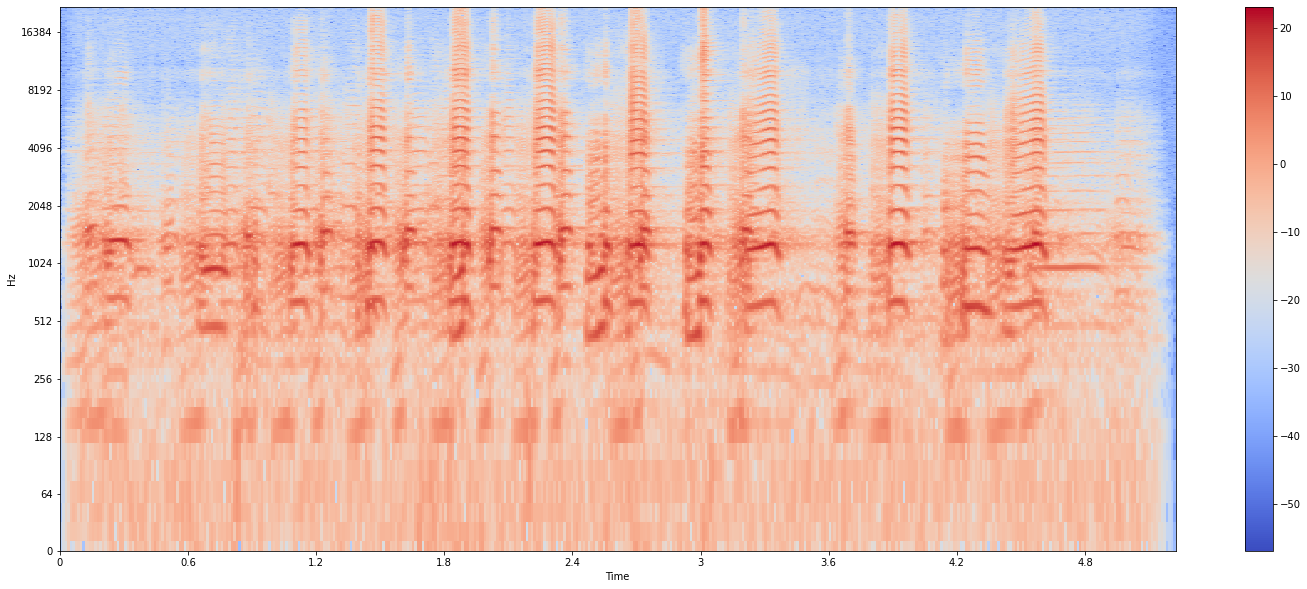

In [3]:
x, sample_rate = librosa.load('test.wav', sr=44100)
x = librosa.stft(x, n_fft=2048, hop_length=512)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=512, y_axis='log')
# librosa.frames_to_time(range(spectrogram.shape[1]), sr=samplingFrequency, hop_length=512)
# librosa.fft_frequencies(sr=samplingFrequency, n_fft=2048)

# Spectrogram to sound 

### STFT output
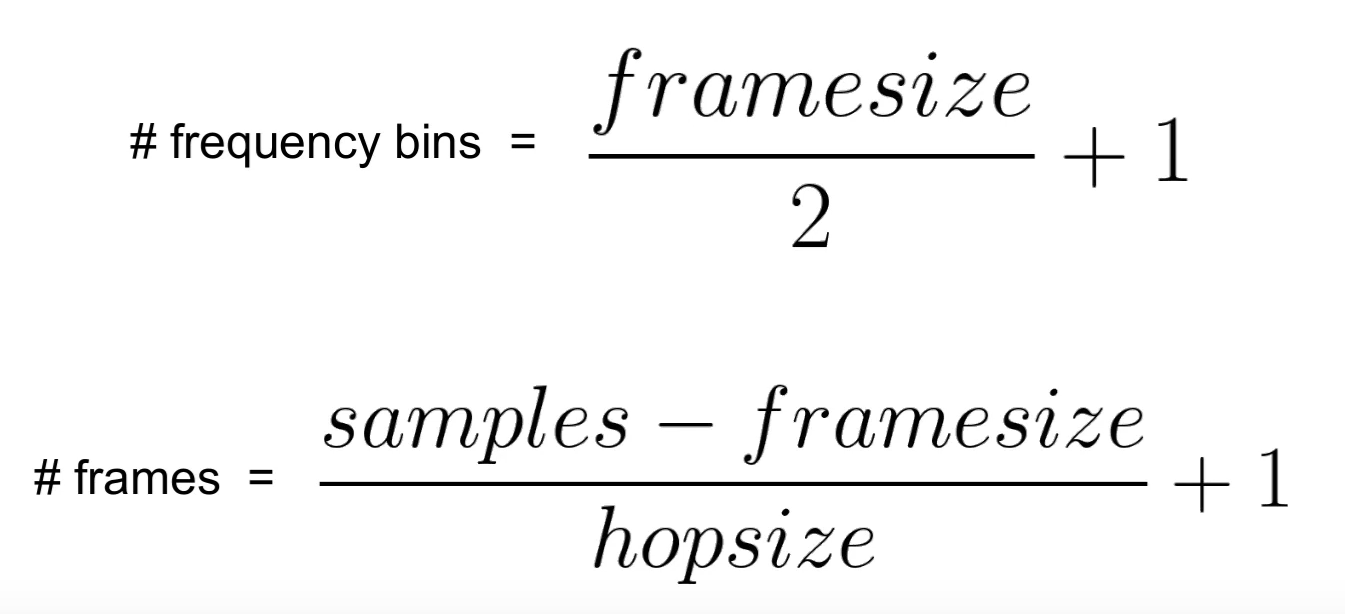

### Frequencies from FT
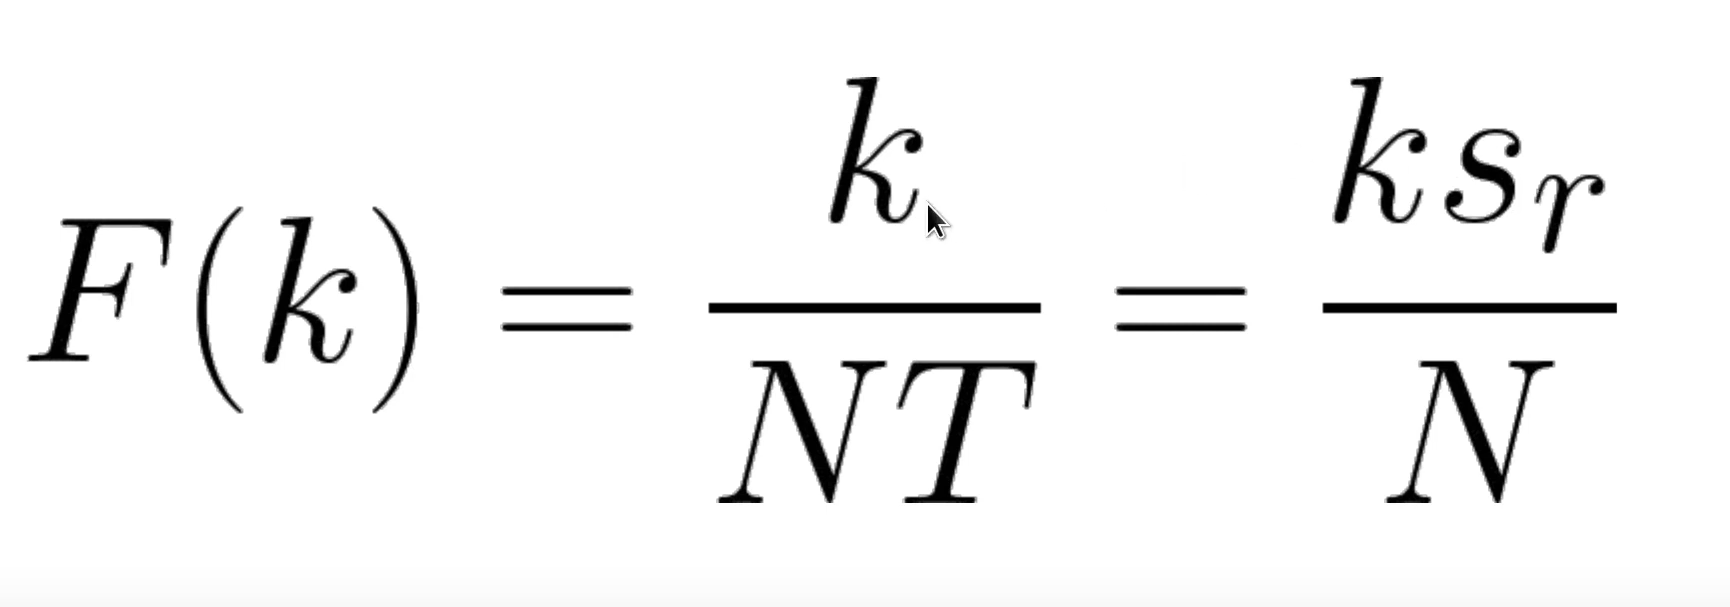

### Max frequency = SR / 2
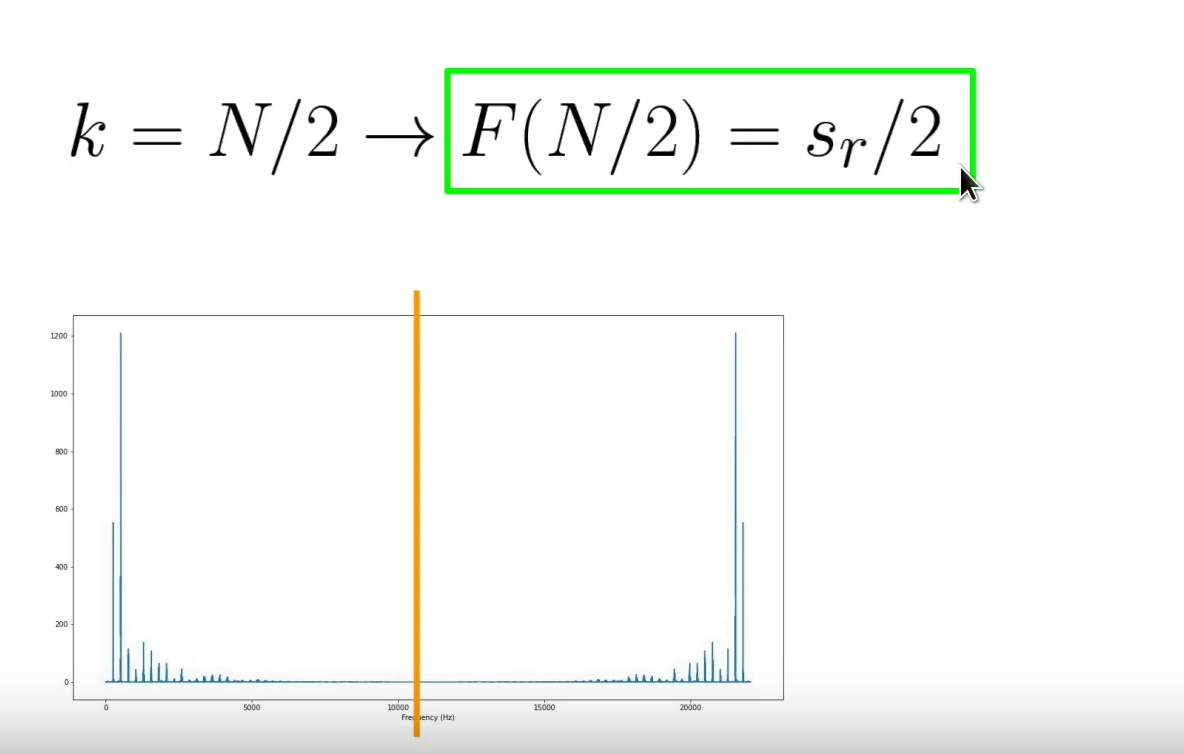

In [9]:
FRAME_SIZE = 2048
SR = 44100
HOP_LENGTH = 512

In [10]:
x, sample_rate = librosa.load('test.wav', sr=SR)
ipd.Audio(x, rate=SR)

In [11]:
x = x[:226816] # n_frames is likely to be integer

# in speech processing, the recommended value is 512,
D = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

mag, actual_phase = librosa.magphase(D)

print(f'x.shape {x.shape}, sample_rate {sample_rate}')
print(f'stft.shape {D.shape} (center=False if n_frames = (n_samples - frame_size) / hop_length + 1 needed')
print(f'mag.shape {mag.shape}, actual_phase.shape {actual_phase.shape}')

x.shape (226816,), sample_rate 44100
stft.shape (1025, 444) (center=False if n_frames = (n_samples - frame_size) / hop_length + 1 needed
mag.shape (1025, 444), actual_phase.shape (1025, 444)


In [12]:
# Trying to reconstruct the phase using the iterative algorithm above.
phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
x_ = librosa.istft(mag * phase, hop_length=HOP_LENGTH)
print(f'x_ (after istft) {x_.shape}')

x_ (after istft) (226816,)


In [13]:
for i in range(100+1):
    _, phase = librosa.magphase(librosa.stft(x_, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))
    #print(f'phase {phase.shape}')
    x_ = librosa.istft(mag * phase, hop_length=HOP_LENGTH)
    #print(f'x_ {x_.shape}')
    #if i % 10 == 0:
scipy.io.wavfile.write('recon.wav', SR, x_)

In [14]:
print(f'x_ {x_.shape}')

x_ (226816,)


In [15]:
ipd.Audio(x_, rate=SR)

# Sounds

In [2]:
def restore(D, frame_size, hop_length, epochs=100, length=None):

    mag, _ = librosa.magphase(D)
    
    phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
    
    for i in range(epochs):
        _, phase = librosa.magphase(librosa.stft(x_, n_fft=frame_size, hop_length=hop_length, center=False))
        x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
        
    return x_

In [3]:
def restore(D, frame_size, hop_length, epochs=100, length=None):

    D = np.concatenate((np.zeros((D.shape[0], 1)), D, np.zeros((D.shape[0], 1))), axis=1)
    mag, _ = librosa.magphase(D)
    
    phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
    
    for i in range(epochs):
        _, phase = librosa.magphase(librosa.stft(x_, n_fft=frame_size, hop_length=hop_length, center=False))
        x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
        
    return x_[hop_length:-hop_length]

### A

In [11]:
FRAME_SIZE = 7394
SR = 22050
HOP_LENGTH = 7394*2

In [12]:
x, sample_rate = librosa.load('letters/A.wav', sr=SR)
print(f'signal shape {x.shape}')

signal shape (7394,)


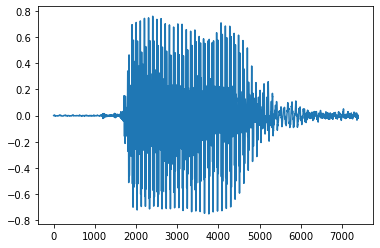

In [13]:
plt.plot(x)

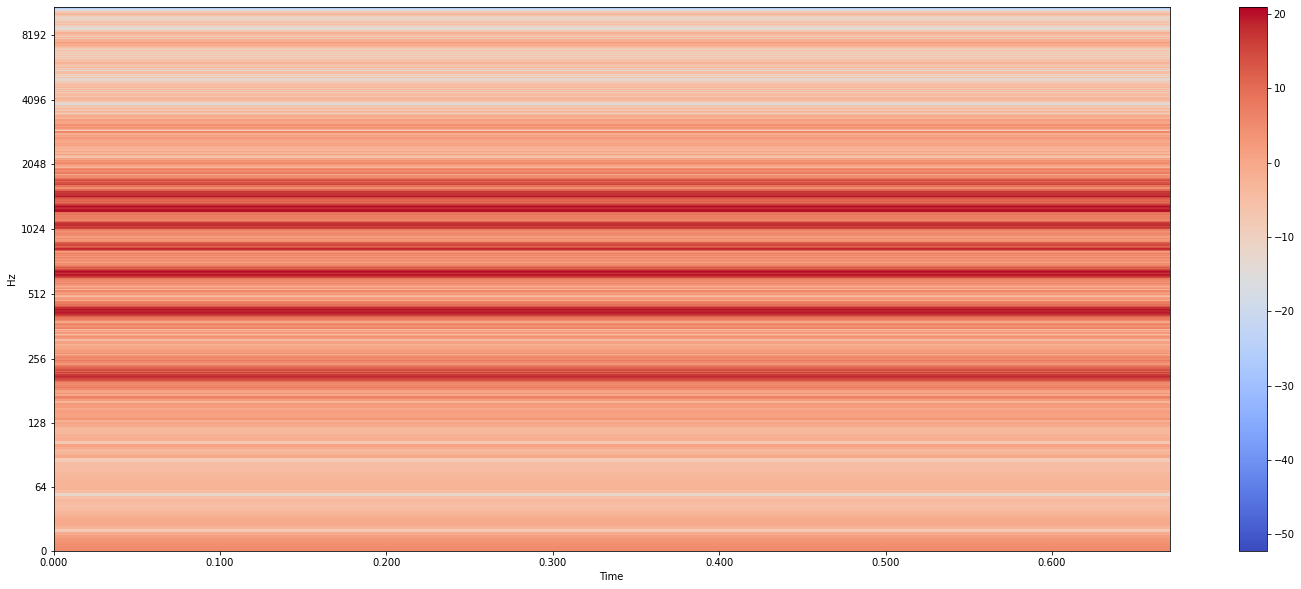

In [14]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [15]:
X_A.shape

(3698, 1)

In [280]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)

In [300]:
scipy.io.wavfile.write('recon.wav', SR, x_[1000:6300])

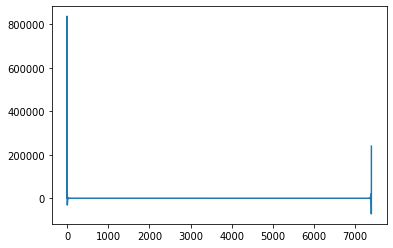

In [282]:
plt.plot(x_)

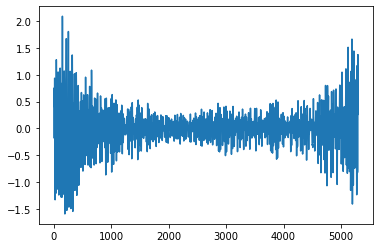

In [299]:
plt.plot(x_[1000:6300])

In [ ]:
x_ = librosa.stft(x_, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

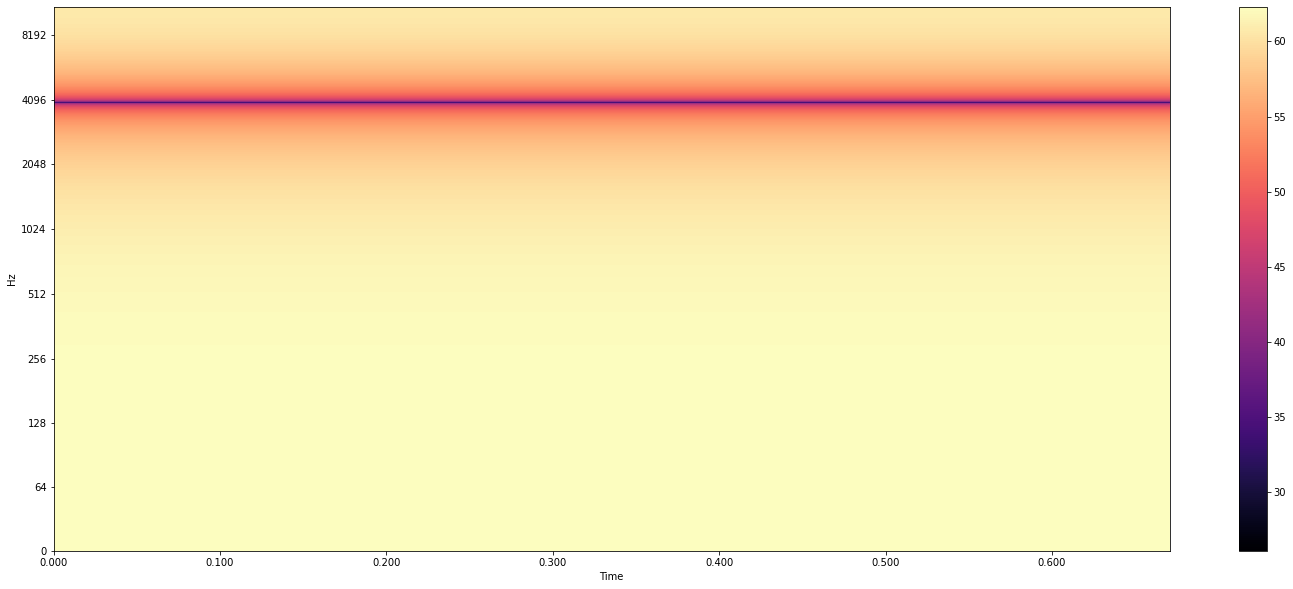

In [189]:
plot_spectrogram(np.abs(x_[400:7100]), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

### B

signal shape (9117,)


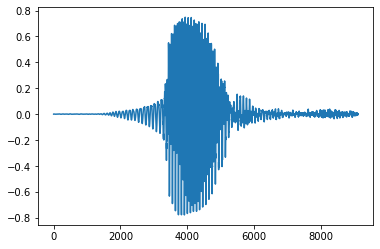

In [16]:
FRAME_SIZE = 9116
SR = 22050
HOP_LENGTH = 9116*2

x, sample_rate = librosa.load('letters/B.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

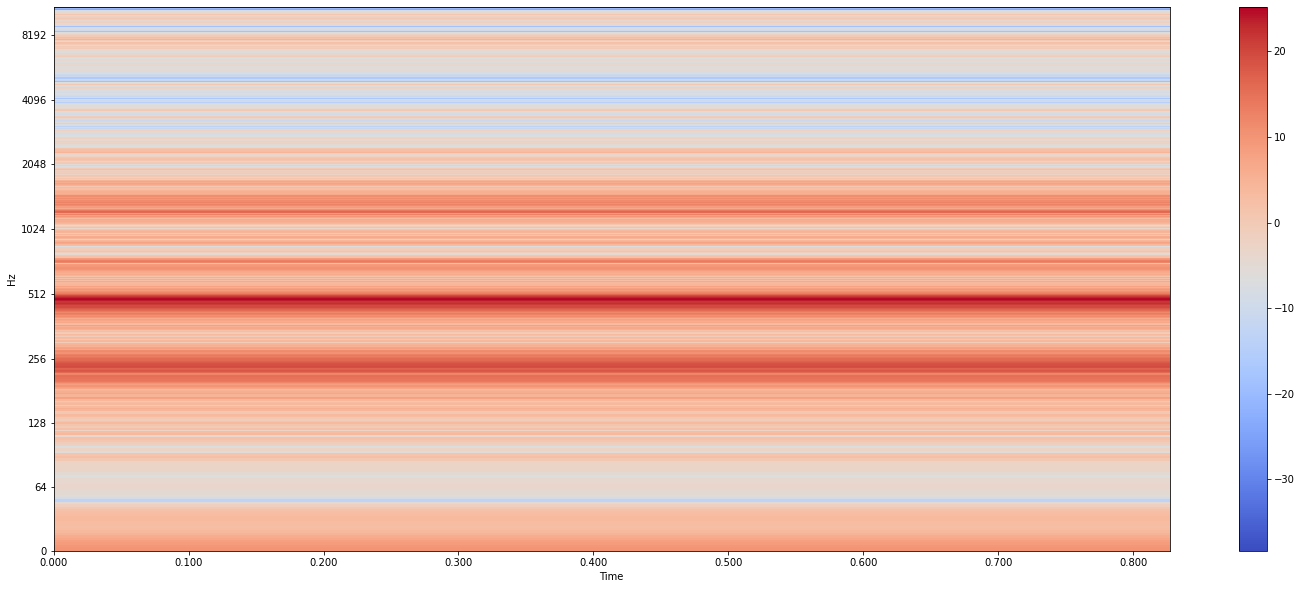

In [17]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [18]:
X_B.shape

(4559, 1)

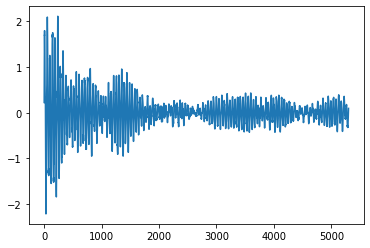

In [306]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_)
plt.plot(x_[1000:6300])

### U

signal shape (49392,)


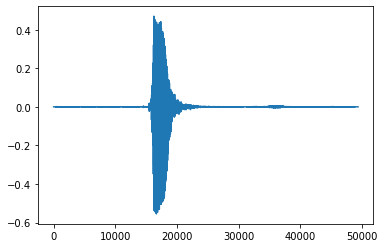

In [19]:
FRAME_SIZE = 49392
SR = 22050
HOP_LENGTH = 49392*2

x, sample_rate = librosa.load('letters/u.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

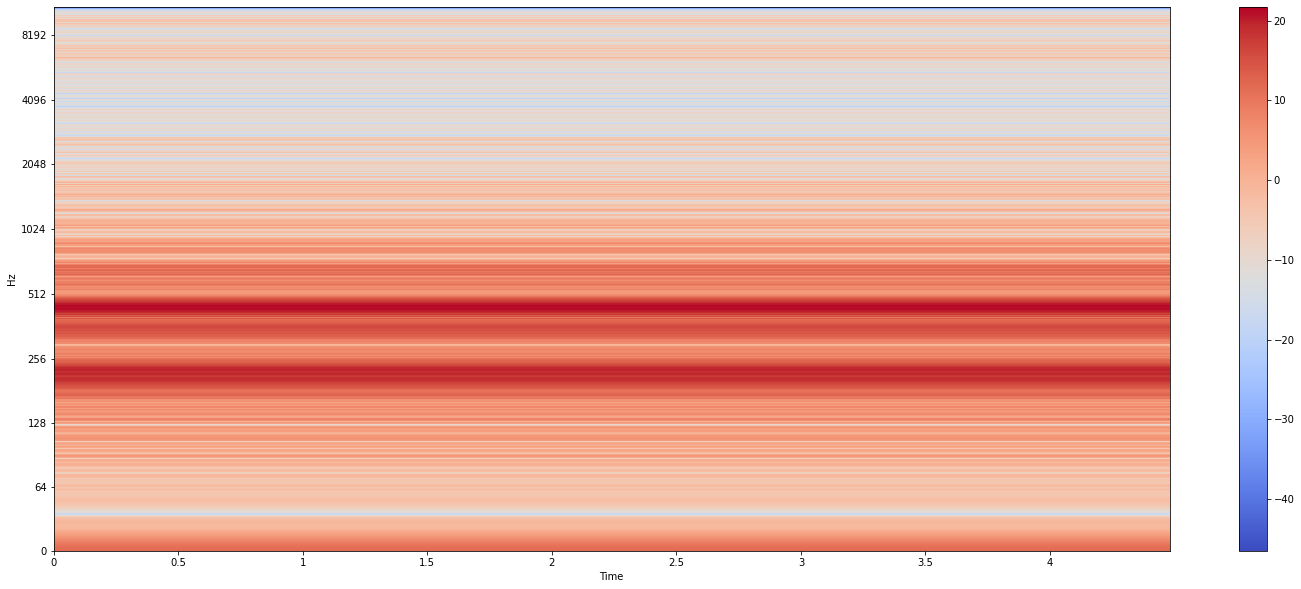

In [20]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [21]:
X_U.shape

(24697, 1)

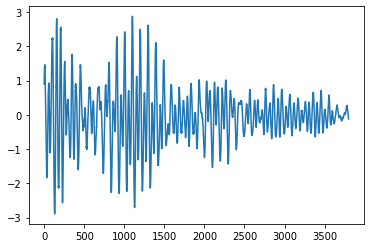

In [323]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_)
plt.plot(x_[2500:6300])

### F

signal shape (12793,)


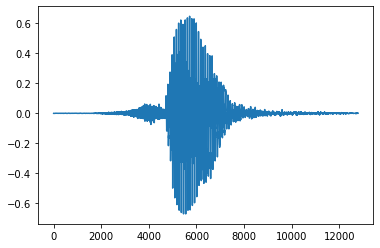

In [22]:
FRAME_SIZE = 12792
SR = 22050
HOP_LENGTH = 12792*2

x, sample_rate = librosa.load('letters/f.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

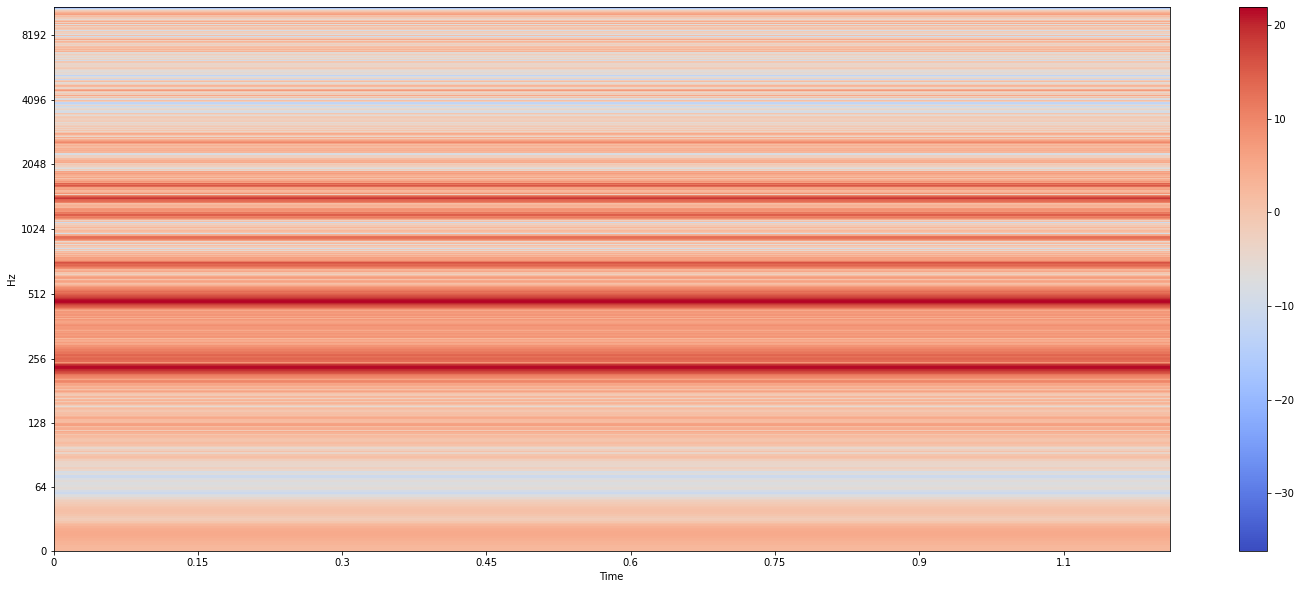

In [23]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [24]:
X_F.shape

(6397, 1)

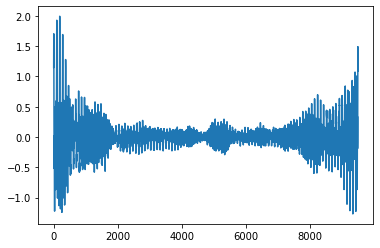

In [25]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_)
plt.plot(x_[1500:11000])

### G

signal shape (7512,)


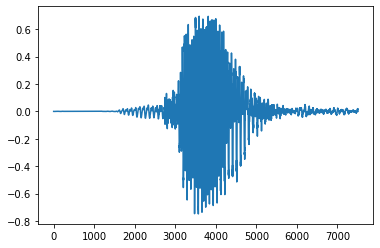

In [25]:
FRAME_SIZE = 7512
SR = 22050
HOP_LENGTH = 7512*2

x, sample_rate = librosa.load('letters/G.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

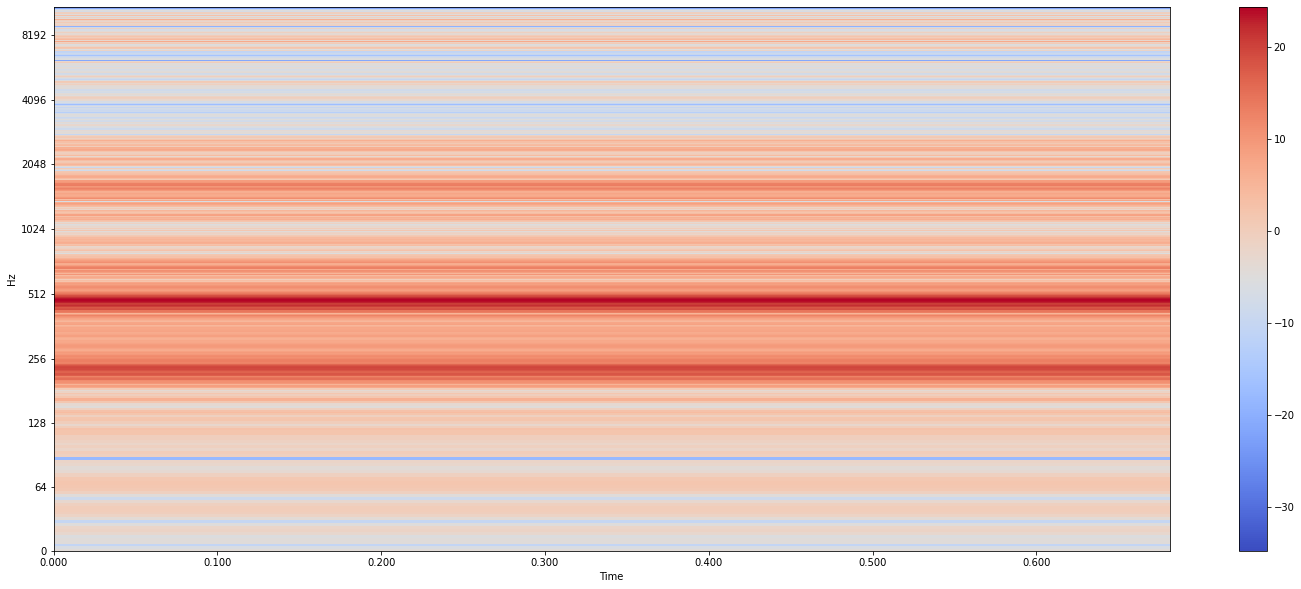

In [26]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [27]:
X_G.shape

(3757, 1)

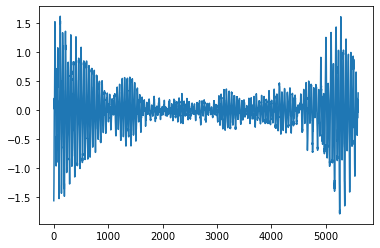

In [50]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_[900:6500])
plt.plot(x_[900:6500])

### M

signal shape (6526,)


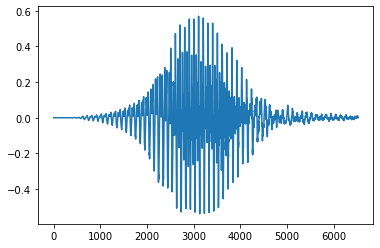

In [28]:
FRAME_SIZE = 6526
SR = 22050
HOP_LENGTH = 6526*2

x, sample_rate = librosa.load('letters/m.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

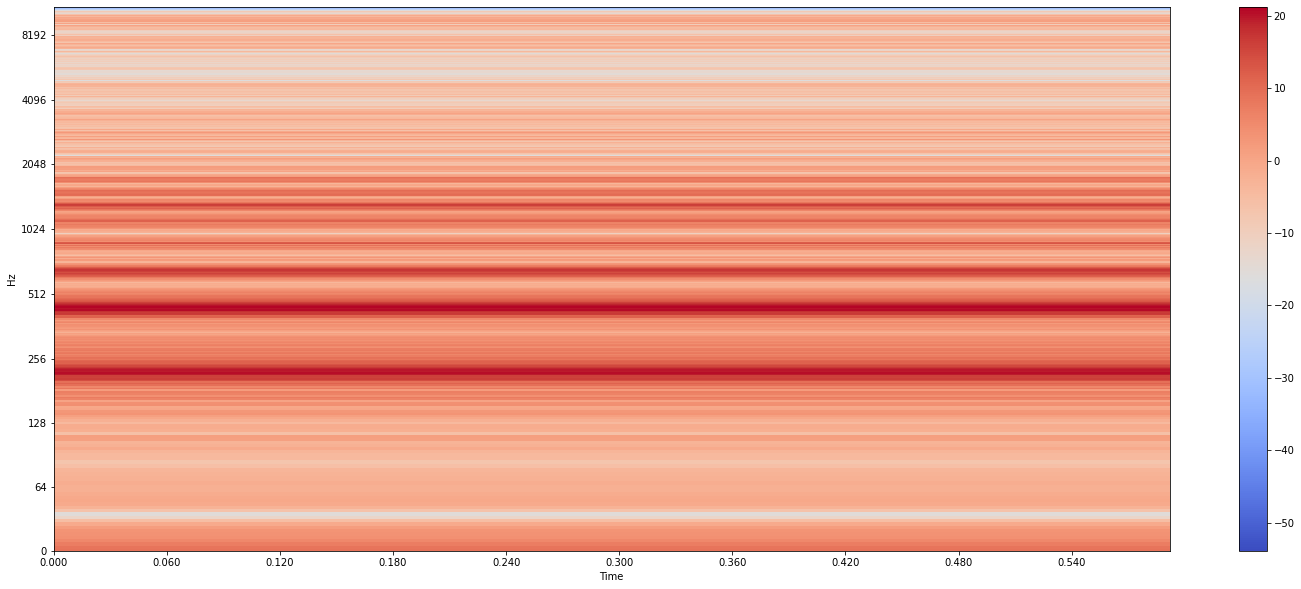

In [29]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [30]:
X_M.shape

(3264, 1)

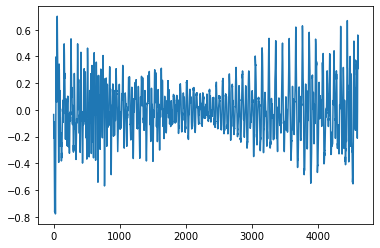

In [6]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_)
plt.plot(x_[900:5500])

### R

signal shape (7642,)


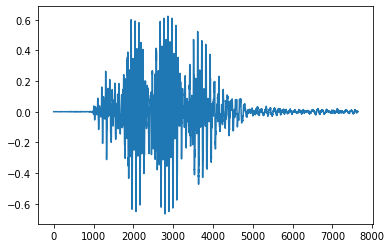

In [31]:
FRAME_SIZE = 7642
SR = 22050
HOP_LENGTH = 7642*2

x, sample_rate = librosa.load('letters/R.wav', sr=SR)
print(f'signal shape {x.shape}')

plt.plot(x)

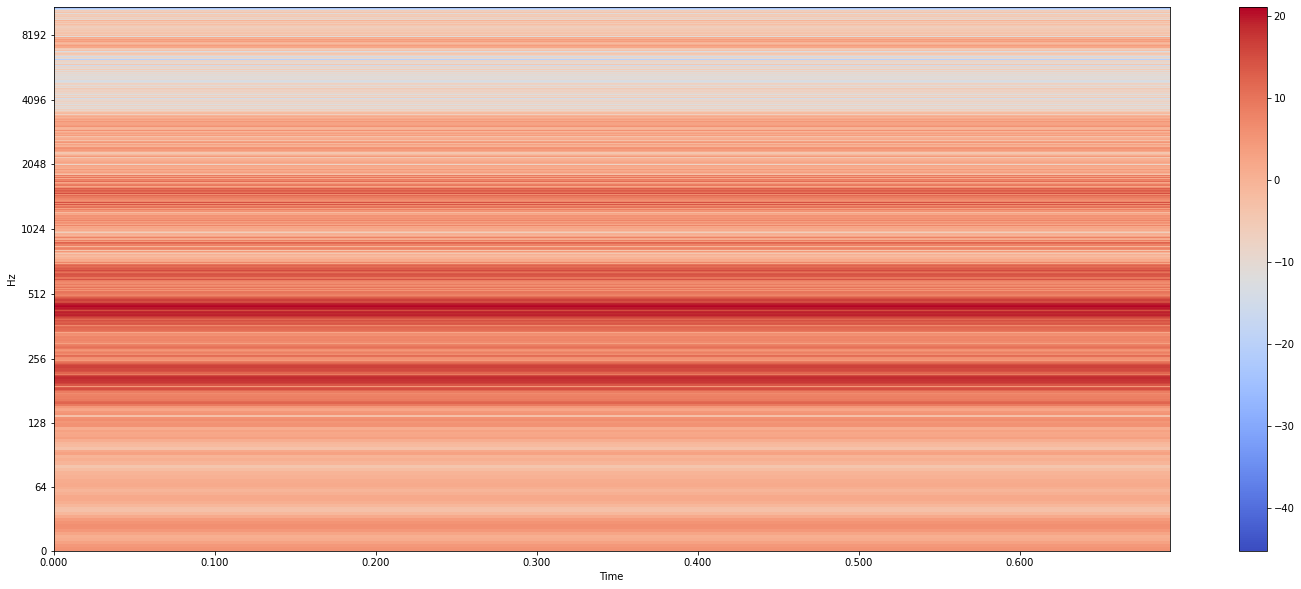

In [32]:
x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

plot_spectrogram(np.abs(x), sr=sample_rate, hop_length=HOP_LENGTH, y_axis='log')

In [33]:
X_R.shape

(3822, 1)

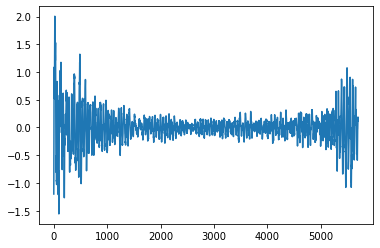

In [91]:
x_ = restore(x, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
scipy.io.wavfile.write('recon.wav', SR, x_)
plt.plot(x_[800:6500])

In [36]:
np.savetxt("foo.csv", X_A, delimiter=",")

# Restoring edf sounds using data.csv

In [455]:
df = pd.read_csv('./data/data.csv')
df.head(6)

std       mean         A         B         F         G         M  \
0  49.018457  46.254223 -0.689641  0.717700 -0.911971  0.265465  0.759605   
1  44.819961  42.157218 -0.680877  0.738600 -0.904273  0.279194  0.699291   
2  34.967258  32.611735 -0.660081  0.786035 -0.870447  0.308594  0.558677   
3  24.096517  22.100828 -0.616033  0.853658 -0.777318  0.343823  0.345968   
4  15.380552  13.912634 -0.576022  0.907408 -0.584207  0.358553  0.153699   
5   9.303293   8.809884 -0.566381  0.898180 -0.248056  0.318896  0.093488   

          R         U  
0 -0.882113  0.740955  
1 -0.891642  0.759708  
2 -0.919461  0.796683  
3 -0.982328  0.832231  
4 -1.078809  0.819376  
5 -1.193989  0.697862

In [456]:
data = df.values
data = np.append(data, np.zeros((4501 - 793, 9)), axis=0)
data.shape

(4501, 9)

In [457]:
std = data[:, 0]
mean = data[:, 1]
Adata = data[:, 2]
Bdata = data[:, 3]
Fdata = data[:, 4]
Gdata = data[:, 5]
Mdata = data[:, 6]
Rdata = data[:, 7]
Udata = data[:, 8]

In [458]:
Adata = np.abs(Adata * std + mean)
Bdata = np.abs(Bdata * std + mean)
Fdata = np.abs(Fdata * std + mean)
Gdata = np.abs(Gdata * std + mean)
Mdata = np.abs(Mdata * std + mean)
Rdata = np.abs(Rdata * std + mean)
Udata = np.abs(Udata * std + mean)

In [459]:
FRAME_SIZE = 9000
SR = 22050
HOP_LENGTH = 9000*2

In [460]:
A_ = restore(Adata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
B_ = restore(Bdata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
F_ = restore(Fdata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
G_ = restore(Gdata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
M_ = restore(Mdata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
R_ = restore(Rdata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
U_ = restore(Udata.reshape(-1, 1), frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)

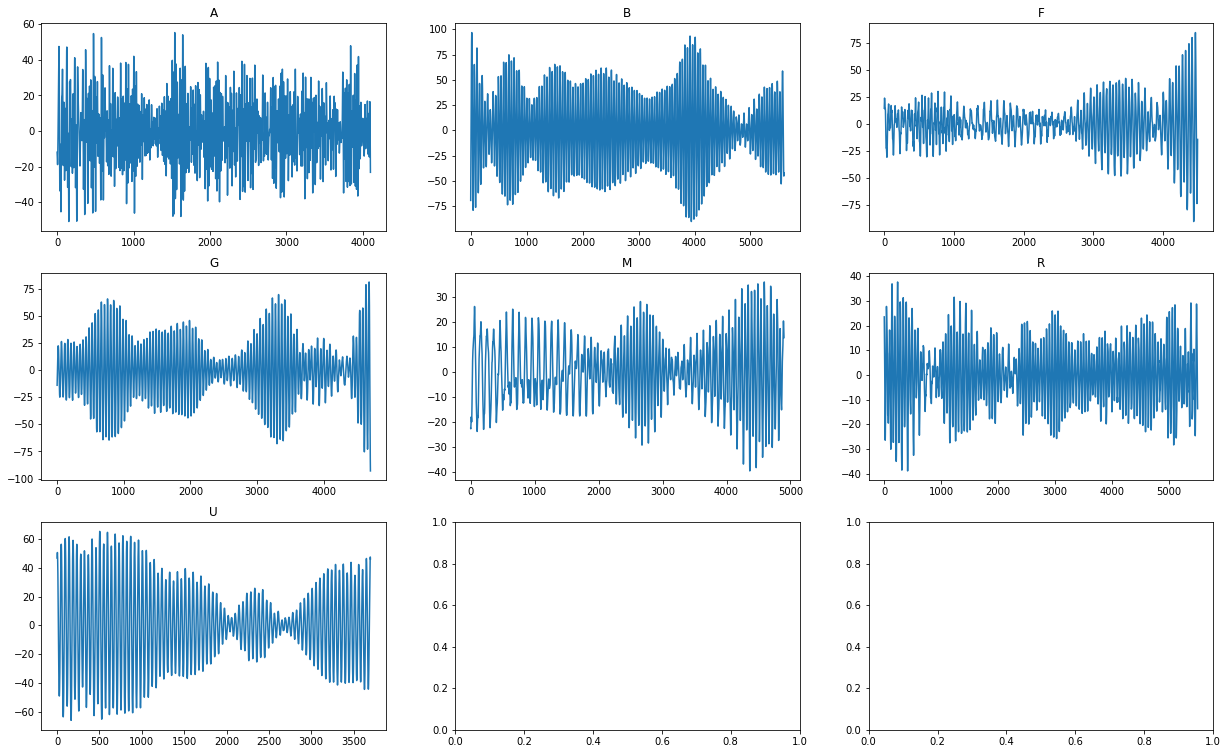

In [461]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A_[2100:6200])
axes[0][0].set_title('A')
A_ = A_[2100:6200]
scipy.io.wavfile.write('./sounds/snds_from_eeg/A.wav', SR, A_ / np.max(A_))

axes[0][1].plot(B_[1800:7400])
axes[0][1].set_title('B')
B_ = B_[1800:7400]
scipy.io.wavfile.write('./sounds/snds_from_eeg/B.wav', SR, B_ / np.max(B_))

axes[0][2].plot(F_[2500:7000])
axes[0][2].set_title('F')
F_ = F_[2500:7000]
scipy.io.wavfile.write('./sounds/snds_from_eeg/F.wav', SR, F_ / np.max(F_))

axes[1][0].plot(G_[2500:7200])
axes[1][0].set_title('G')
G_ = G_[2500:7200]
scipy.io.wavfile.write('./sounds/snds_from_eeg/G.wav', SR, G_ / np.max(G_))

axes[1][1].plot(M_[1900:6800])
axes[1][1].set_title('M')
M_ = M_[1900:6800]
scipy.io.wavfile.write('./sounds/snds_from_eeg/M.wav', SR, M_ / np.max(M_))

axes[1][2].plot(R_[1800:7300])
axes[1][2].set_title('R')
R_ = R_[1800:7300]
scipy.io.wavfile.write('./sounds/snds_from_eeg/R.wav', SR, R_ / np.max(R_))

axes[2][0].plot(U_[2500:6200])
axes[2][0].set_title('U')
U_ = U_[2500:6200]
scipy.io.wavfile.write('./sounds/snds_from_eeg/U.wav', SR, U_ / np.max(U_))

# Letters to spectrum (10 frames)

### Preprocessing

In [541]:
FRAME_SIZE = 4392
SR = 22050
HOP_LENGTH = 512

In [528]:
A, _ = librosa.load('sounds/A.wav', sr=SR)
B, _ = librosa.load('sounds/B.wav', sr=SR)
F, _ = librosa.load('sounds/f.wav', sr=SR)
G, _ = librosa.load('sounds/G.wav', sr=SR)
M, _ = librosa.load('sounds/m.wav', sr=SR)
R, _ = librosa.load('sounds/R.wav', sr=SR)
U, _ = librosa.load('sounds/u.wav', sr=SR)

In [529]:
print(A.shape)
print(B.shape)
print(F.shape)
print(G.shape)
print(M.shape)
print(R.shape)
print(U.shape)

(7394,)
(9117,)
(12793,)
(7512,)
(6526,)
(7642,)
(49392,)


In [530]:
A = np.pad(A, ((9000 - A.shape[0]) // 2, (9000 - A.shape[0]) // 2), 'constant', constant_values=(0, 0))
B = B[:9000]
F = F[2000:11000]
G = np.pad(G, ((9000 - G.shape[0]) // 2, (9000 - G.shape[0]) // 2), 'constant', constant_values=(0, 0))
M = np.pad(M, ((9000 - M.shape[0]) // 2, (9000 - M.shape[0]) // 2), 'constant', constant_values=(0, 0))
R = np.pad(R, ((9000 - R.shape[0]) // 2, (9000 - R.shape[0]) // 2), 'constant', constant_values=(0, 0))
U = U[14000:23000]

In [531]:
print(A.shape)
print(B.shape)
print(F.shape)
print(G.shape)
print(M.shape)
print(R.shape)
print(U.shape)

(9000,)
(9000,)
(9000,)
(9000,)
(9000,)
(9000,)
(9000,)


Text(0.5, 1.0, 'U')

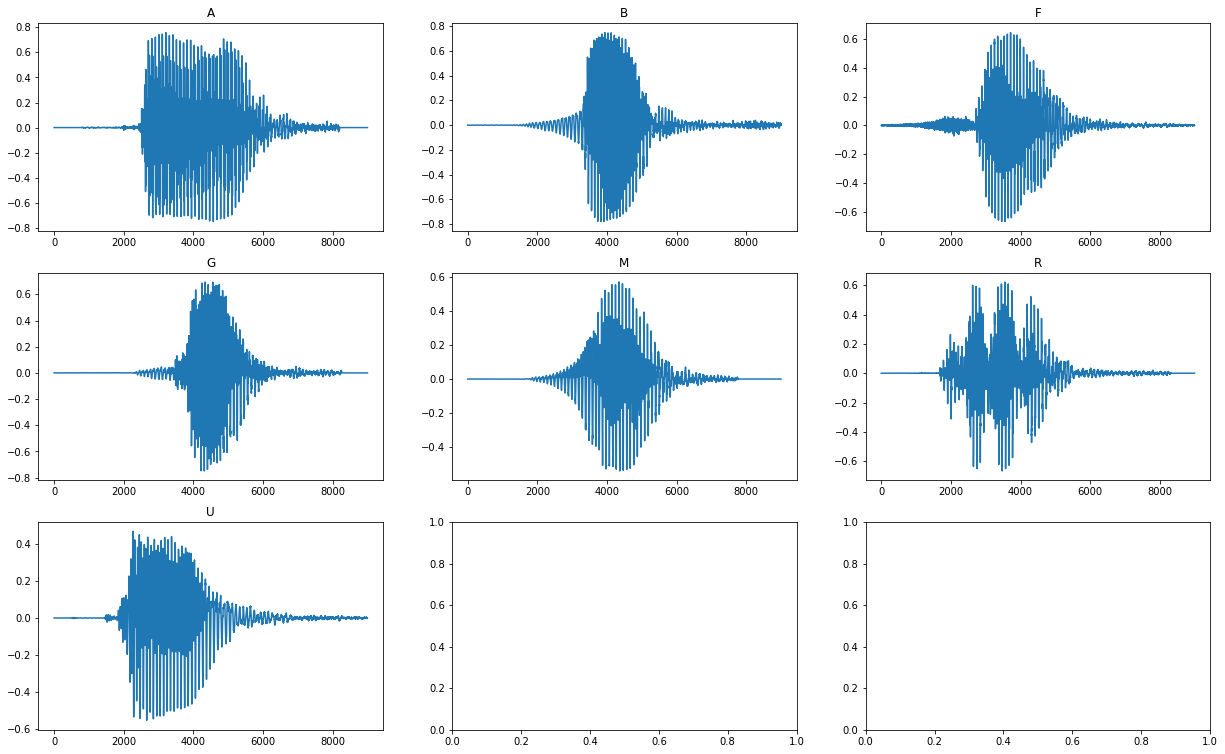

In [532]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A)
axes[0][0].set_title('A')

axes[0][1].plot(B)
axes[0][1].set_title('B')

axes[0][2].plot(F)
axes[0][2].set_title('F')

axes[1][0].plot(G)
axes[1][0].set_title('G')

axes[1][1].plot(M)
axes[1][1].set_title('M')

axes[1][2].plot(R)
axes[1][2].set_title('R')

axes[2][0].plot(U)
axes[2][0].set_title('U')

### FFT

In [533]:
Afft = librosa.stft(A, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Bfft = librosa.stft(B, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Ffft = librosa.stft(F, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Gfft = librosa.stft(G, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Mfft = librosa.stft(M, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Rfft = librosa.stft(R, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Ufft = librosa.stft(U, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

In [534]:
Afft.shape

(2197, 10)

In [535]:
A_ = restore(Afft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
B_ = restore(Bfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
F_ = restore(Ffft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
G_ = restore(Gfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
M_ = restore(Mfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
R_ = restore(Rfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
U_ = restore(Ufft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
A_.shape

(9000,)

In [536]:
Afft = Afft[:800, :]
Bfft = Bfft[:800, :]
Ffft = Ffft[:800, :]
Gfft = Gfft[:800, :]
Mfft = Mfft[:800, :]
Rfft = Rfft[:800, :]
Ufft = Ufft[:800, :]

In [499]:
Arez = (np.abs(np.squeeze(Afft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Brez = (np.abs(np.squeeze(Bfft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Frez = (np.abs(np.squeeze(Ffft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Grez = (np.abs(np.squeeze(Gfft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Mrez = (np.abs(np.squeeze(Mfft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Rrez = (np.abs(np.squeeze(Rfft.reshape(-1, 1))) ** 2).reshape(-1, 1)
Urez = (np.abs(np.squeeze(Ufft.reshape(-1, 1))) ** 2).reshape(-1, 1)

In [500]:
Rez = np.concatenate((Arez, Brez, Frez, Grez, Mrez, Rrez, Urez), axis=1)

In [501]:
Rez.shape

(8000, 7)

In [502]:
np.savetxt("patoca.csv", Rez, delimiter=",")

### Restoring rez files

In [538]:
A = np.concatenate((Afft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
B = np.concatenate((Bfft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
F = np.concatenate((Ffft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
G = np.concatenate((Gfft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
M = np.concatenate((Mfft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
R = np.concatenate((Rfft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)
U = np.concatenate((Ufft.reshape(800, -1), np.zeros((2197 - 800, 10))), axis=0)

In [542]:
A_ = restore(A, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
B_ = restore(B, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
F_ = restore(F, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
G_ = restore(G, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
M_ = restore(M, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
R_ = restore(R, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)
U_ = restore(U, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)

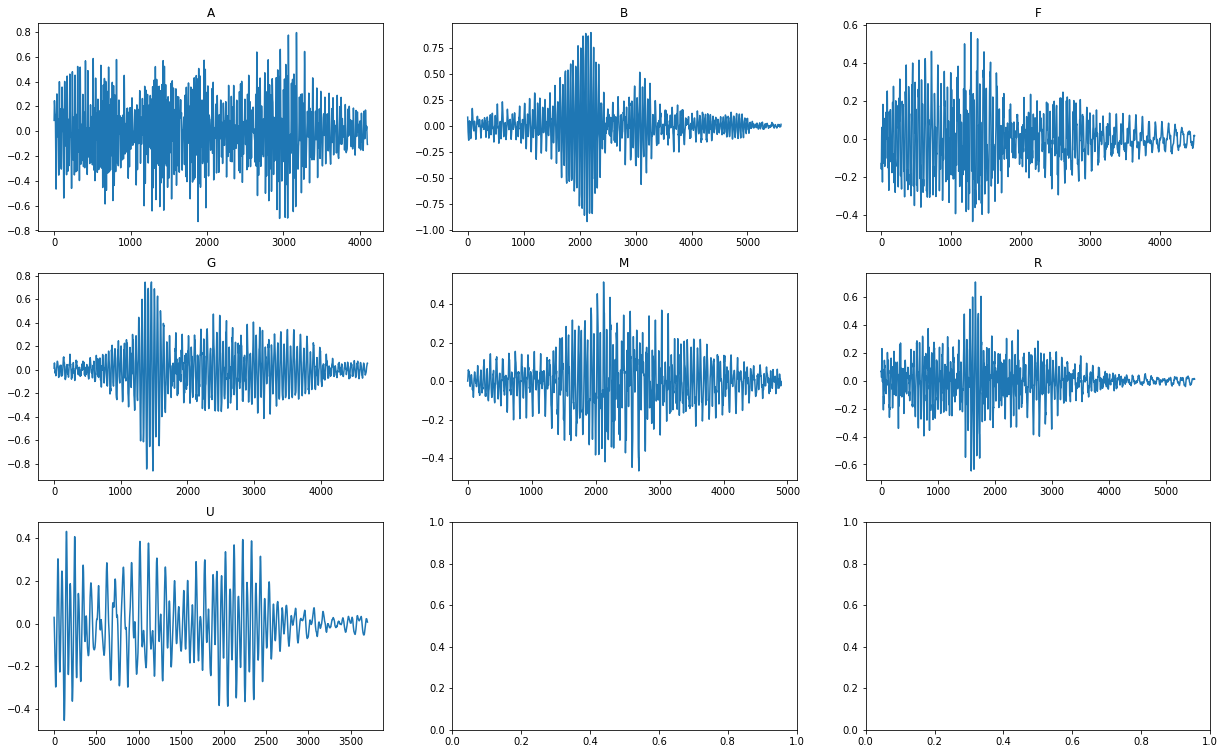

In [543]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A_[2100:6200])
axes[0][0].set_title('A')
A_ = A_[2100:6200]
scipy.io.wavfile.write('./sounds/snds_through_alg10/A.wav', SR, A_ / np.max(A_))

axes[0][1].plot(B_[1800:7400])
axes[0][1].set_title('B')
B_ = B_[1800:7400]
scipy.io.wavfile.write('./sounds/snds_through_alg10/B.wav', SR, B_ / np.max(B_))

axes[0][2].plot(F_[2500:7000])
axes[0][2].set_title('F')
F_ = F_[2500:7000]
scipy.io.wavfile.write('./sounds/snds_through_alg10/F.wav', SR, F_ / np.max(F_))

axes[1][0].plot(G_[2500:7200])
axes[1][0].set_title('G')
G_ = G_[2500:7200]
scipy.io.wavfile.write('./sounds/snds_through_alg10/G.wav', SR, G_ / np.max(G_))

axes[1][1].plot(M_[1900:6800])
axes[1][1].set_title('M')
M_ = M_[1900:6800]
scipy.io.wavfile.write('./sounds/snds_through_alg10/M.wav', SR, M_ / np.max(M_))

axes[1][2].plot(R_[1800:7300])
axes[1][2].set_title('R')
R_ = R_[1800:7300]
scipy.io.wavfile.write('./sounds/snds_through_alg10/R.wav', SR, R_ / np.max(R_))

axes[2][0].plot(U_[2500:6200])
axes[2][0].set_title('U')
U_ = U_[2500:6200]
scipy.io.wavfile.write('./sounds/snds_through_alg10/U.wav', SR, U_ / np.max(U_))

# Testing without cut 

In [162]:
A, _ = librosa.load('sounds/A.wav', sr=SR)
A = A[778:]
Afft = librosa.stft(A, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
_, PHASE = librosa.magphase(Afft)

In [163]:
def restore(D, hop_length, phase):

    mag, _ = librosa.magphase(D)
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False)
        
    return x_

(6616,)


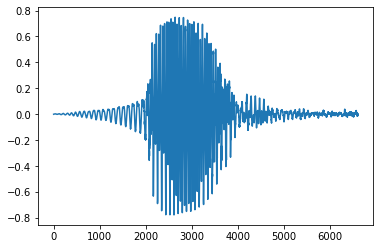

In [164]:
A, _ = librosa.load('sounds/B.wav', sr=SR)
A = A[1300:7916]
print(A.shape)
#A = A[778:]
#print(A.shape)
plt.plot(A)

In [171]:
Afft = librosa.stft(A, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
mag, PHASE = librosa.magphase(Afft)
#phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
A_ = librosa.istft(mag * PHASE, hop_length=HOP_LENGTH, center=False)

#A_ = restore(Afft, hop_length=HOP_LENGTH, phase=PHASE)

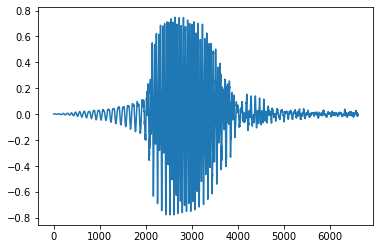

In [172]:
plt.plot(A_)

In [126]:
Afft.shape

(859, 1334)

/home/srg/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


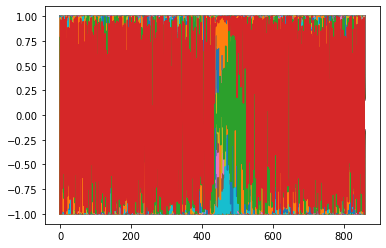

In [117]:
# A
plt.plot(phase)
plt.show()

/home/srg/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


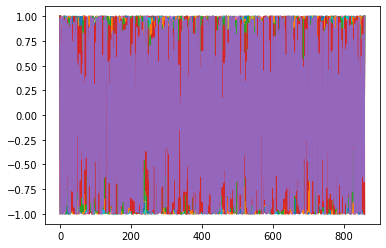

In [173]:
# B
plt.plot(PHASE)
plt.show()

In [175]:
# F
F, _ = librosa.load('sounds/f.wav', sr=SR)
F = F[2400:9016]
Ffft = librosa.stft(F, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
mag, PHASE = librosa.magphase(Ffft)

/home/srg/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


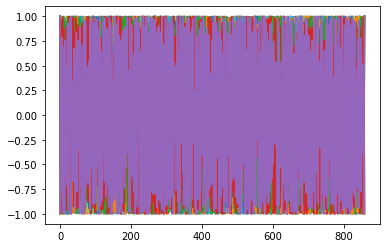

In [176]:
plt.plot(PHASE)

/home/srg/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


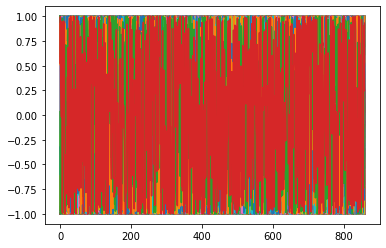

In [118]:
rand_phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=phase.shape))
plt.plot(rand_phase)
plt.show()

Text(0.5, 1.0, 'rand_phase')

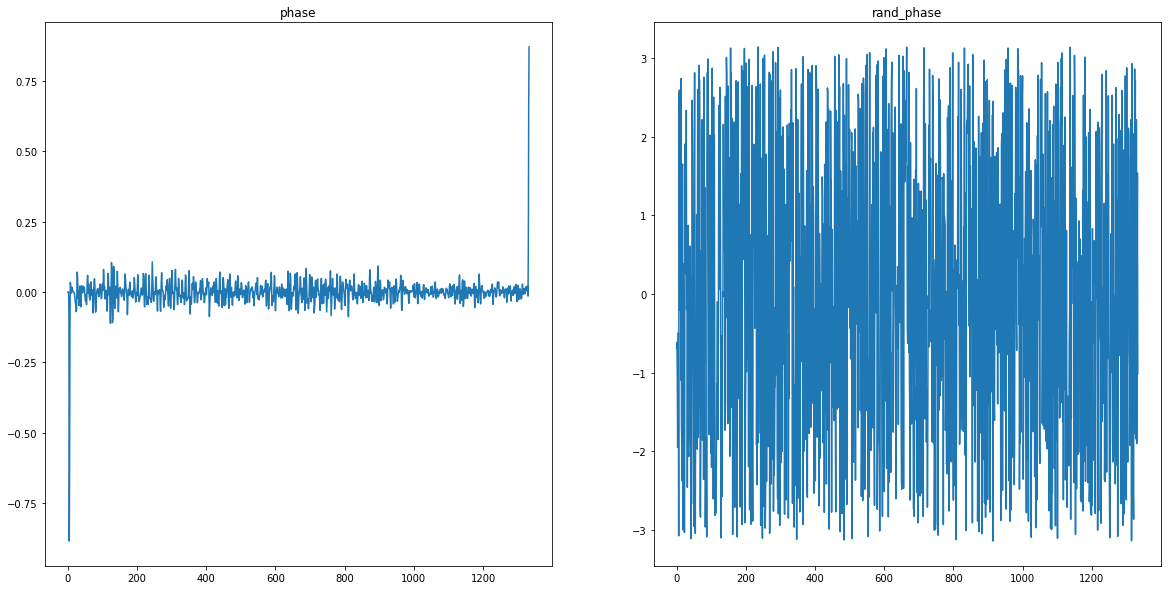

In [139]:
fig, axes = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)

axes[0].plot(np.angle(phase[1, :]))
axes[0].set_title('phase')
axes[1].plot(np.angle(rand_phase[0, :]))
axes[1].set_title('rand_phase')

In [109]:
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ar.wav', SR, A_)

### Adding extra frames

In [58]:
def restore(D, frame_size, hop_length, epochs=100, length=None):

    D = np.concatenate((np.zeros((D.shape[0], 1)), D, np.zeros((D.shape[0], 1))), axis=1)
    mag, _ = librosa.magphase(D)
    
    phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
    
    for i in range(epochs):
        _, phase = librosa.magphase(librosa.stft(x_, n_fft=frame_size, hop_length=hop_length, center=False))
        x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
        
    return x_[hop_length:-hop_length]

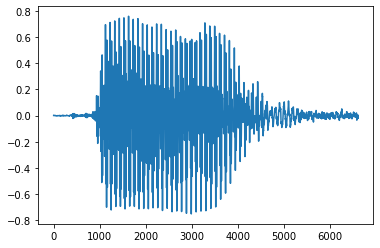

In [60]:
A, _ = librosa.load('sounds/A.wav', sr=SR)
A = A[778:]
plt.plot(A)

In [61]:
Afft = librosa.stft(A, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Afft.shape

(859, 15)

In [50]:
New = np.concatenate((np.zeros((859, 1)), Afft, np.zeros((859, 1))), axis=1)
New.shape

(859, 17)

In [62]:
x_ = restore(New, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
x_.shape

(6616,)

(6616,)


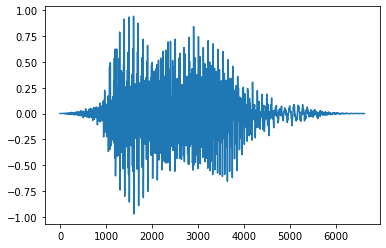

In [57]:
print(x_[HOP_LENGTH:-HOP_LENGTH].shape)
plt.plot(x_[HOP_LENGTH:-HOP_LENGTH])

In [56]:
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ar.wav', SR, x_[HOP_LENGTH:-HOP_LENGTH])

(6616,)


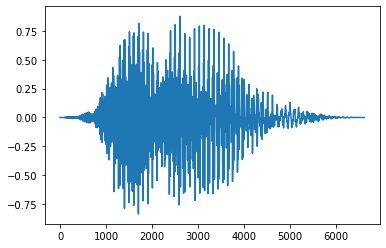

In [63]:
x_ = restore(Afft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
print(x_.shape)
plt.plot(x_)

In [64]:
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ar.wav', SR, x_)

# Letters to spec (15 frames) 300 ms => 6615 samples

In [3]:
FRAME_SIZE = 1716 # 2832
SR = 22050
HOP_LENGTH = 350 # 512

In [17]:
A, _ = librosa.load('sounds/A.wav', sr=SR)
B, _ = librosa.load('sounds/B.wav', sr=SR)
F, _ = librosa.load('sounds/f.wav', sr=SR)
G, _ = librosa.load('sounds/G.wav', sr=SR)
M, _ = librosa.load('sounds/m.wav', sr=SR)
R, _ = librosa.load('sounds/R.wav', sr=SR)
U, _ = librosa.load('sounds/u.wav', sr=SR)

In [18]:
print(A.shape)
print(B.shape)
print(F.shape)
print(G.shape)
print(M.shape)
print(R.shape)
print(U.shape)

(7394,)
(9117,)
(12793,)
(7512,)
(6526,)
(7642,)
(49392,)


Text(0.5, 1.0, 'U')

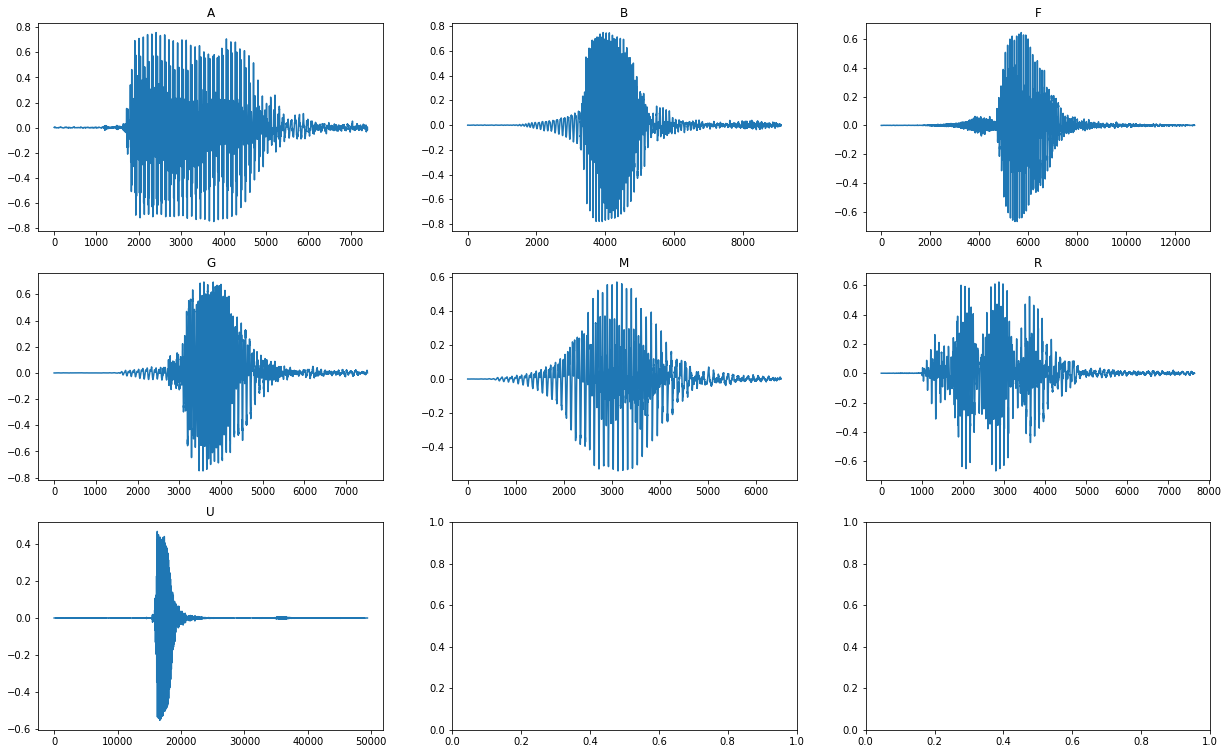

In [6]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A)
axes[0][0].set_title('A')

axes[0][1].plot(B)
axes[0][1].set_title('B')

axes[0][2].plot(F)
axes[0][2].set_title('F')

axes[1][0].plot(G)
axes[1][0].set_title('G')

axes[1][1].plot(M)
axes[1][1].set_title('M')

axes[1][2].plot(R)
axes[1][2].set_title('R')

axes[2][0].plot(U)
axes[2][0].set_title('U')

# Cuting 6615 + 1

Text(0.5, 1.0, 'U (6616,)')

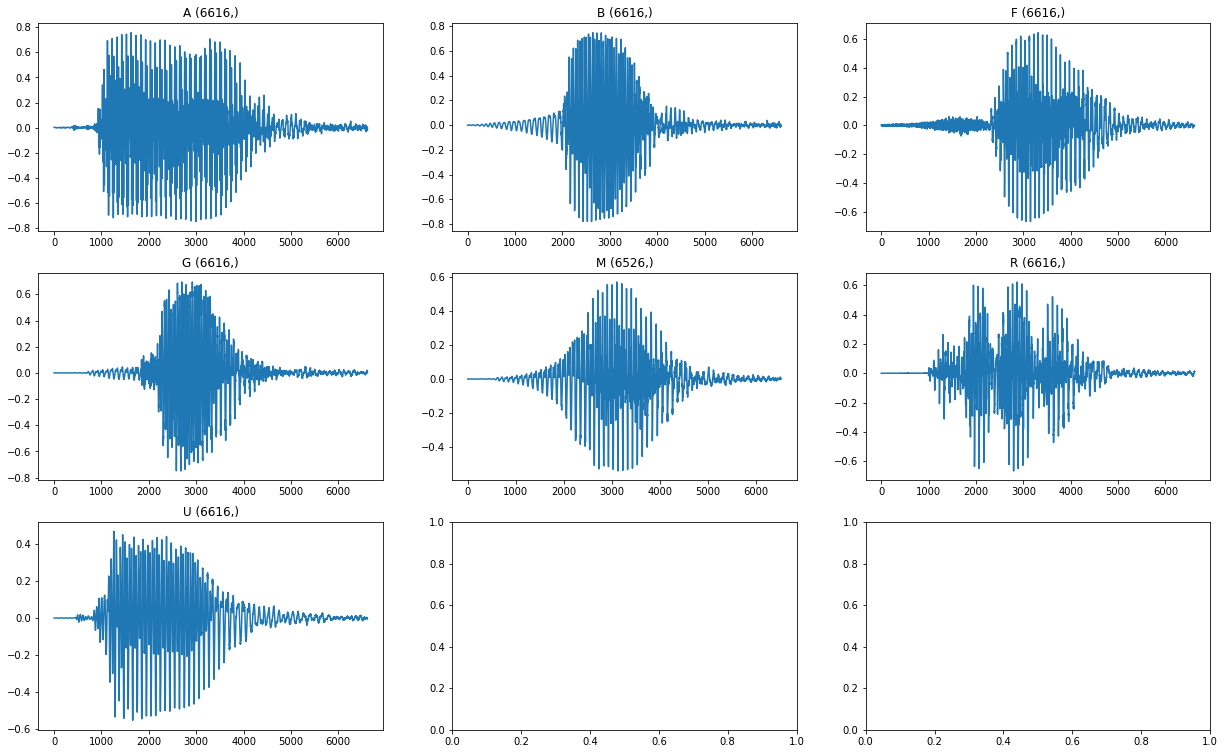

In [161]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A[778:])
axes[0][0].set_title(f'A {A[778:].shape}')

axes[0][1].plot(B[1300:7916])
axes[0][1].set_title(f'B {B[1300:7916].shape}')

axes[0][2].plot(F[2400:9016])
axes[0][2].set_title(f'F {F[2400:9016].shape}')

axes[1][0].plot(G[896:])
axes[1][0].set_title(f'G {G[896:].shape}')

axes[1][1].plot(M)
axes[1][1].set_title(f'M {M.shape}')

axes[1][2].plot(R[:6616])
axes[1][2].set_title(f'R {R[:6616].shape}')

axes[2][0].plot(U[15000:21616])
axes[2][0].set_title(f'U {U[15000:21616].shape}')

In [22]:
# old
A = np.pad(A, ((10000 - A.shape[0]) // 2, (10000 - A.shape[0]) // 2), 'constant', constant_values=(0, 0))
B = np.pad(B, ((10000 - B.shape[0]) // 2 + 1, (10000 - B.shape[0]) // 2), 'constant', constant_values=(0, 0))
F = F[2000:12000]
G = np.pad(G, ((10000 - G.shape[0]) // 2, (10000 - G.shape[0]) // 2), 'constant', constant_values=(0, 0))
M = np.pad(M, ((10000 - M.shape[0]) // 2, (10000 - M.shape[0]) // 2), 'constant', constant_values=(0, 0))
R = np.pad(R, ((10000 - R.shape[0]) // 2, (10000 - R.shape[0]) // 2), 'constant', constant_values=(0, 0))
U = U[13000:23000]

In [19]:
# new
A = A[778:]
B = B[1300:7916]
F = F[2400:9016]
G = G[896:]
M = np.concatenate((M, np.zeros(6616 - 6526)), axis=0)
R = R[:6616]
U = U[15000:21616]

In [20]:
print(A.shape)
print(B.shape)
print(F.shape)
print(G.shape)
print(M.shape)
print(R.shape)
print(U.shape)

(6616,)
(6616,)
(6616,)
(6616,)
(6616,)
(6616,)
(6616,)


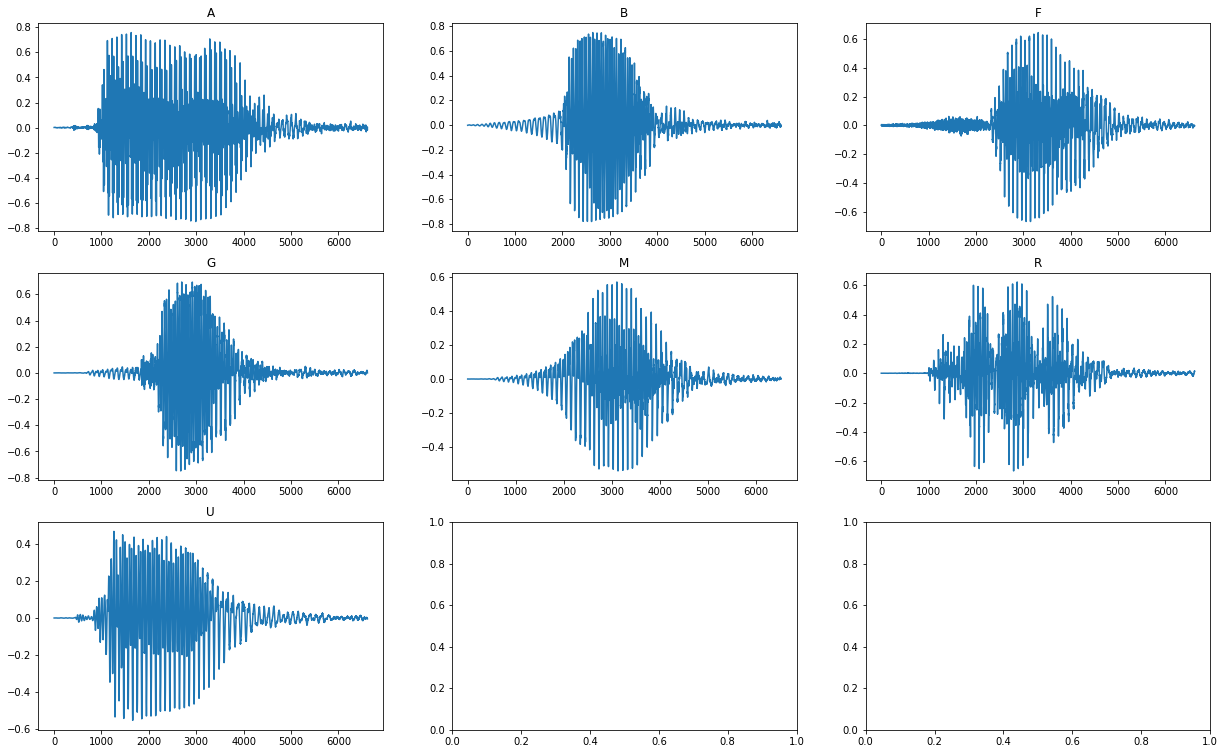

In [69]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A)
axes[0][0].set_title('A')
scipy.io.wavfile.write('./sounds/snds_through_alg15/A.wav', SR, A)

axes[0][1].plot(B)
axes[0][1].set_title('B')
scipy.io.wavfile.write('./sounds/snds_through_alg15/B.wav', SR, B)

axes[0][2].plot(F)
axes[0][2].set_title('F')
scipy.io.wavfile.write('./sounds/snds_through_alg15/F.wav', SR, F)

axes[1][0].plot(G)
axes[1][0].set_title('G')
scipy.io.wavfile.write('./sounds/snds_through_alg15/G.wav', SR, G)

axes[1][1].plot(M)
axes[1][1].set_title('M')
scipy.io.wavfile.write('./sounds/snds_through_alg15/M.wav', SR, M)

axes[1][2].plot(R)
axes[1][2].set_title('R')
scipy.io.wavfile.write('./sounds/snds_through_alg15/R.wav', SR, R)

axes[2][0].plot(U)
axes[2][0].set_title('U')
scipy.io.wavfile.write('./sounds/snds_through_alg15/U.wav', SR, U)

In [21]:
Afft = librosa.stft(A, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Bfft = librosa.stft(B, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Ffft = librosa.stft(F, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Gfft = librosa.stft(G, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Mfft = librosa.stft(M, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Rfft = librosa.stft(R, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)
Ufft = librosa.stft(U, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)

In [22]:
Afft.shape

(859, 15)

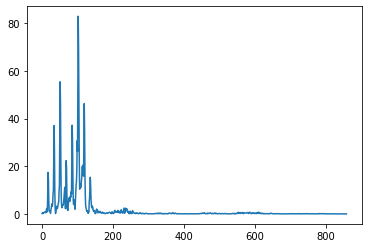

In [186]:
plt.plot(np.abs(Afft[:, 1]))

In [23]:
Afft = Afft[:666, :]
print(Afft.shape)
Bfft = Bfft[:666, :]
print(Bfft.shape)
Ffft = Ffft[:666, :]
print(Ffft.shape)
Gfft = Gfft[:666, :]
print(Gfft.shape)
Mfft = Mfft[:666, :]
print(Mfft.shape)
Rfft = Rfft[:666, :]
print(Rfft.shape)
Ufft = Ufft[:666, :]
print(Ufft.shape)

(666, 15)
(666, 15)
(666, 15)
(666, 15)
(666, 15)
(666, 15)
(666, 15)


In [24]:
# Saving matrix
Arez = (np.abs(np.squeeze(Afft.reshape(-1, 1)))).reshape(-1, 1)
Brez = (np.abs(np.squeeze(Bfft.reshape(-1, 1)))).reshape(-1, 1)
Frez = (np.abs(np.squeeze(Ffft.reshape(-1, 1)))).reshape(-1, 1)
Grez = (np.abs(np.squeeze(Gfft.reshape(-1, 1)))).reshape(-1, 1)
Mrez = (np.abs(np.squeeze(Mfft.reshape(-1, 1)))).reshape(-1, 1)
Rrez = (np.abs(np.squeeze(Rfft.reshape(-1, 1)))).reshape(-1, 1)
Urez = (np.abs(np.squeeze(Ufft.reshape(-1, 1)))).reshape(-1, 1)
Rez = np.concatenate((Arez, Brez, Frez, Grez, Mrez, Rrez, Urez), axis=1)

In [25]:
Rez.shape

(9990, 7)

In [11]:
np.savetxt("phonemes.csv", Rez, delimiter=",")

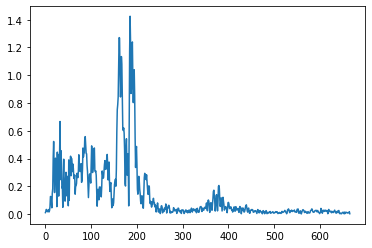

In [150]:
plt.plot(np.abs(Afft[:, 1]))

In [12]:
Afft = np.abs(np.concatenate((Afft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Bfft = np.abs(np.concatenate((Bfft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Ffft = np.abs(np.concatenate((Ffft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Gfft = np.abs(np.concatenate((Gfft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Mfft = np.abs(np.concatenate((Mfft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Rfft = np.abs(np.concatenate((Rfft, np.zeros((859 - 666, 15))), axis=0)) #** 2
Ufft = np.abs(np.concatenate((Ufft, np.zeros((859 - 666, 15))), axis=0)) #** 2

In [13]:
Afft.shape

(859, 15)

In [14]:
A_ = restore(Afft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
B_ = restore(Bfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
F_ = restore(Ffft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
G_ = restore(Gfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
M_ = restore(Mfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
R_ = restore(Rfft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
U_ = restore(Ufft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
A_.shape

(6616,)

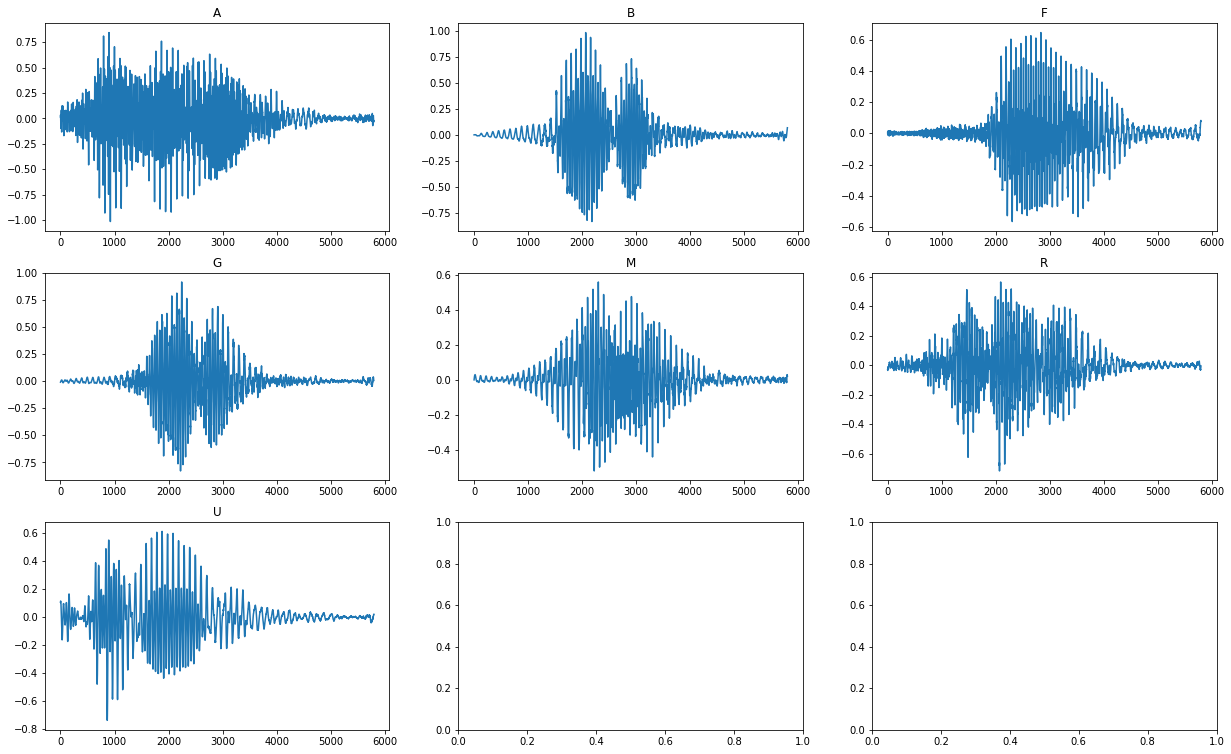

In [15]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A_[500:6300])
axes[0][0].set_title('A')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ar.wav', SR, A_[500:6300])

axes[0][1].plot(B_[500:6300])
axes[0][1].set_title('B')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Br.wav', SR, B_[500:6300])

axes[0][2].plot(F_[500:6300])
axes[0][2].set_title('F')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Fr.wav', SR, F_[500:6300])

axes[1][0].plot(G_[500:6300])
axes[1][0].set_title('G')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Gr.wav', SR, G_[500:6300])

axes[1][1].plot(M_[500:6300])
axes[1][1].set_title('M')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Mr.wav', SR, M_[500:6300])

axes[1][2].plot(R_[500:6300])
axes[1][2].set_title('R')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Rr.wav', SR, R_[500:6300])

axes[2][0].plot(U_[500:6300])
axes[2][0].set_title('U')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ur.wav', SR, U_[500:6300])

# Ax = b, x = A^(+)b

### Squared

In [26]:
b = Rez.T
print(f'b is {b.shape}')

b is (7, 9990)


In [27]:
df = pd.read_csv('./data/psicor.csv')
Aplus = df.values
print(f'A^(+) is {Aplus.shape}')

A^(+) is (36, 7)


In [28]:
X = np.dot(Aplus, b)
X.shape

(36, 9990)

In [29]:
np.savetxt("Xabs1.csv", X.T, delimiter=",")

# Restoring specs by A*X = B

In [5]:
A = np.loadtxt('./data/cor.csv', delimiter=',', ndmin=2)
print(f'A is {A.shape}')

A is (7348, 36)


In [12]:
B = np.dot(A, X)
print(f'B is {B.shape}')

B is (3674, 9990)


In [13]:
B = B.reshape(B.shape[0], 666, 15)
B.shape

(3674, 666, 15)

In [14]:
Specs = np.concatenate((B, np.zeros((B.shape[0], 859 - 666, 15))), axis=1)
Specs.shape

(3674, 859, 15)

In [40]:
# restoring
for i, spec in enumerate(Specs):
    x_ = restore(spec, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    scipy.io.wavfile.write(f'./sounds/snds_through_alg15/{i}.wav', SR, x_[500:6300])

# Moore-Penrose

In [208]:
A1 = np.concatenate((A.reshape(-1, 1), B.reshape(-1, 1), F.reshape(-1, 1), G.reshape(-1, 1), M.reshape(-1, 1), R.reshape(-1, 1), U.reshape(-1, 1)), axis=1)

In [209]:
A1.shape

(10000, 7)

In [210]:
b1 = np.concatenate((Afft.reshape(-1, 1), Bfft.reshape(-1, 1), Ffft.reshape(-1, 1), Gfft.reshape(-1, 1), 
                    Mfft.reshape(-1, 1), Rfft.reshape(-1, 1), Ufft.reshape(-1, 1)), axis=1)

In [211]:
b1 = np.concatenate((b1, np.zeros((10, 7))), axis=0)
# 10000 x 7

In [212]:
b1 = np.abs(b1) ** 2

In [213]:
X = np.empty((7, 0))
A = A1
A_plus = np.linalg.pinv(A)

for i in range(7):
    b = b1[:, i]
    x = np.dot(A_plus, b)
    X = np.append(X, x.reshape(-1, 1), axis=1)

In [215]:
X.shape

(7, 7)

In [218]:
SPEC = np.dot(A1, X)
SPEC = SPEC[:9990, :]

In [222]:
SPEC.shape

(9990, 7)

In [224]:
At = SPEC[:, 0].reshape(666, 15)
Bt = SPEC[:, 1].reshape(666, 15)
Ft = SPEC[:, 2].reshape(666, 15)
Gt = SPEC[:, 3].reshape(666, 15)
Mt = SPEC[:, 4].reshape(666, 15)
Rt = SPEC[:, 5].reshape(666, 15)
Ut = SPEC[:, 6].reshape(666, 15)
Ut.shape

(666, 15)

In [225]:
A = np.concatenate((At, np.zeros((1417 - 666, 15))), axis=0)
B = np.concatenate((Bt, np.zeros((1417 - 666, 15))), axis=0)
F = np.concatenate((Ft, np.zeros((1417 - 666, 15))), axis=0)
G = np.concatenate((Gt, np.zeros((1417 - 666, 15))), axis=0)
M = np.concatenate((Mt, np.zeros((1417 - 666, 15))), axis=0)
R = np.concatenate((Rt, np.zeros((1417 - 666, 15))), axis=0)
U = np.concatenate((Ut, np.zeros((1417 - 666, 15))), axis=0)

In [226]:
A.shape

(1417, 15)

In [227]:
A_ = restore(A, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
B_ = restore(B, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
F_ = restore(F, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
G_ = restore(G, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
M_ = restore(M, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
R_ = restore(R, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
U_ = restore(U, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
A_.shape

(10000,)

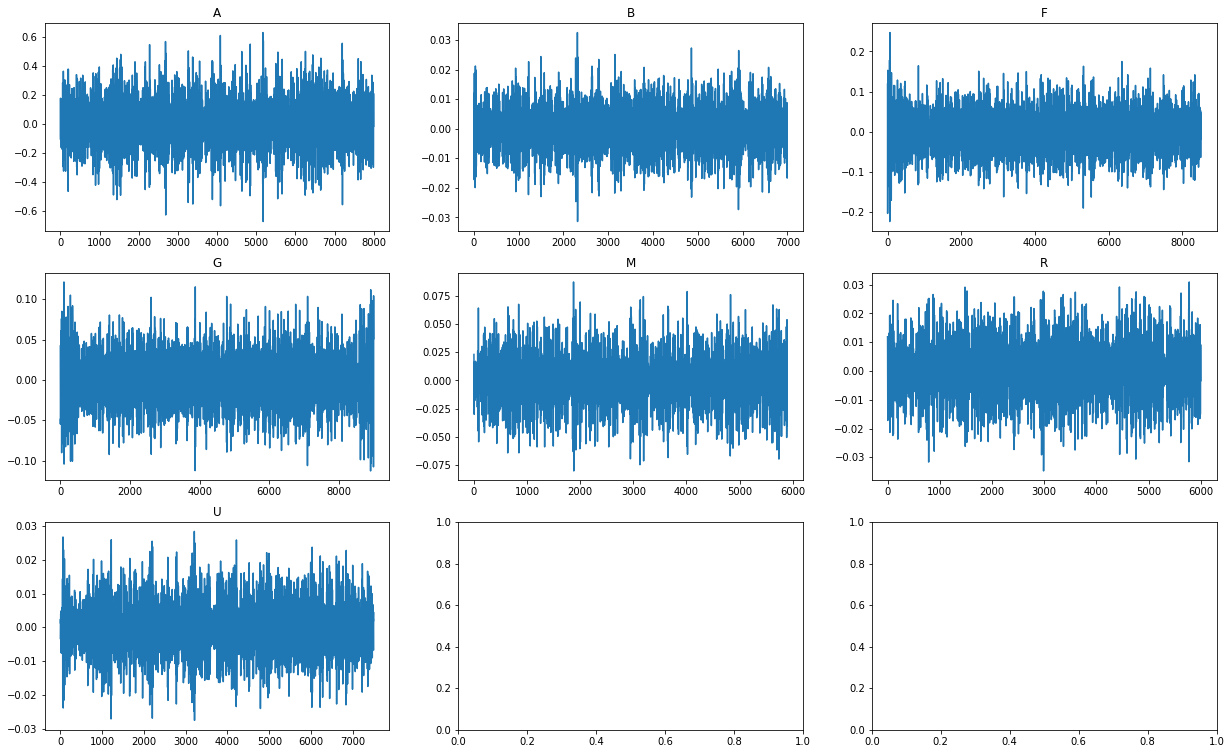

In [228]:
# Plot
fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)

axes[0][0].plot(A_[1000:9000])
axes[0][0].set_title('A')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ar.wav', SR, A_[1000:9000] / np.max(A_[1000:9000]))

axes[0][1].plot(B_[1000: 8000])
axes[0][1].set_title('B')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Br.wav', SR, B_[1000: 8000] / np.max(B_[1000: 8000]))

axes[0][2].plot(F_[500: 9000])
axes[0][2].set_title('F')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Fr.wav', SR, F_[500: 9000] / np.max(F_[500: 9000]))

axes[1][0].plot(G_[500: 9500])
axes[1][0].set_title('G')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Gr.wav', SR, G_[500: 9500] / np.max(G_[500: 9500]))

axes[1][1].plot(M_[1900:7800])
axes[1][1].set_title('M')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Mr.wav', SR, M_[500: 9500] / np.max(M_[500: 9500]))

axes[1][2].plot(R_[1300:7300])
axes[1][2].set_title('R')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Rr.wav', SR, R_[500: 9500] / np.max(R_[500: 9500]))

axes[2][0].plot(U_[1000:8500])
axes[2][0].set_title('U')
scipy.io.wavfile.write('./sounds/snds_through_alg15/Ur.wav', SR, U_[500: 9500] / np.max(U_[500: 9500]))

In [34]:
A = np.genfromtxt('input_file_example.csv', delimiter=',')
if len(A.shape) == 1:
    A = A.reshape(-1, 1)

In [35]:
A.shape

(7, 1)

# Restoring VIE_Varya121f_EP.csv

In [156]:
A = np.loadtxt('./data/syllables/VIE_bashirinslsl_och.csv', delimiter=';', ndmin=2)[496:498, 1:].reshape(2, -1)

In [19]:
A = (A[::2] + A[1::2]) / 2
A.shape

(3674, 36)

In [89]:
A = np.random.rand(1, 36)

In [157]:
X = np.loadtxt('./data/Xabs.csv', delimiter=',', ndmin=2).T

In [158]:
X.shape

(36, 9990)

In [159]:
Rez = np.dot(A, X)
Rez.shape

(2, 9990)

In [160]:
Rez = Rez.reshape(-1, 666, 15)
Rez.shape

(2, 666, 15)

In [161]:
Specs = np.concatenate((Rez, np.zeros((Rez.shape[0], 859 - 666, 15))), axis=1)
Specs.shape

(2, 859, 15)

In [162]:
# restoring
#fig, axes = plt.subplots(figsize=(21, 13), nrows=3, ncols=3)
Rows = np.empty((0, 6616))
for i, spec in enumerate(Specs):
    x_ = restore(spec, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Rows = np.append(Rows, x_.reshape(1, -1), axis=0)
    #axes[i // 3][i % 3].plot(x_)
    #scipy.io.wavfile.write(f'./sounds/snds_through_alg15/{i}.wav', SR, x_)
    if i > 200:
        break
Rows.shape

(2, 6616)

In [163]:
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/RU.wav', SR, np.squeeze(Rows.reshape(-1, 1)))

In [24]:
Specs = np.concatenate(Specs, axis=1)

In [27]:
Rows.shape

(3674, 6616)

In [69]:
FRAME_SIZE = 2832
SR = 22050
HOP_LENGTH = 512
# samples: 23602960

In [70]:
Rez = np.concatenate((Rez, np.zeros((1417 - 666, 46095))), axis=0)

In [26]:
Rez_ = restore(Specs, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=1)

In [27]:
Rez_.shape

(148366,)

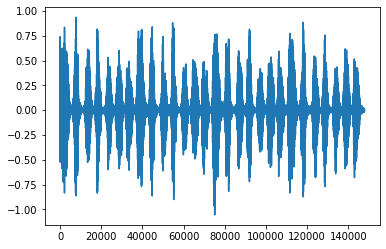

In [29]:
plt.plot(Rez_[300:148066])

In [30]:
scipy.io.wavfile.write('./sounds/fullspec.wav', SR, Rez_[300:Rez.shape[0]-300] / np.max(Rez_[300:Rez.shape[0]-300]))

# Syllables

In [156]:
FRAME_SIZE = 1716 
SR = 22050
HOP_LENGTH = 350

def repeat(ar, times):
    res = np.empty((0, ar.shape[1]))
    for i in range(times):
        res = np.append(res, ar, axis=0)
    return res

In [157]:
A = np.loadtxt('./data/syllables/VIE_bashirinslsl_och.csv', delimiter=';', ndmin=2)
label = A[:, 0]
A = A[:, 1:]
A.shape

(2634, 36)

In [97]:
Syls = np.empty((0, 36))
Ind = np.empty((0, 1))

for i in range(1, 11):
    inds = np.array(sorted(list(set(np.arange(len(label))[label == 10 + i]) &
                            (set(np.arange(len(label))[label == i] - 2)))))
    inds = np.array(sorted(list(set(inds).union(set(inds + 1), set(inds + 2), set(inds + 3)))))
    Syls = np.append(Syls, A[inds].reshape(-1, 36), axis=0)
    Ind = np.append(Ind, label[inds].reshape(-1, 1), axis=0)
    #Ind = np.append(Ind, np.array([10 + i, 0, i, 0] * (len(inds) // 4)).reshape(-1, 1), axis=0)

In [98]:
Ind.shape

(660, 1)

In [99]:
Syls.shape

(660, 36)

In [73]:
np.savetxt("./data/Syls_cor.csv", Syls, delimiter=",")

In [158]:
BA, _ = librosa.load('./data/syllables/sound_files/Ba.wav', sr=SR)
FA, _ = librosa.load('./data/syllables/sound_files/fa.wav', sr=SR)
GA, _ = librosa.load('./data/syllables/sound_files/Ga.wav', sr=SR)
MA, _ = librosa.load('./data/syllables/sound_files/Ma.wav', sr=SR)
RA, _ = librosa.load('./data/syllables/sound_files/Ra.wav', sr=SR)
BU, _ = librosa.load('./data/syllables/sound_files/Bu.wav', sr=SR)
RU, _ = librosa.load('./data/syllables/sound_files/Ru.wav', sr=SR)
MU, _ = librosa.load('./data/syllables/sound_files/mu.wav', sr=SR)
FU, _ = librosa.load('./data/syllables/sound_files/fu.wav', sr=SR)
GU, _ = librosa.load('./data/syllables/sound_files/Gu.wav', sr=SR)

# plot_spectrogram(FU, sr=SR, hop_length=HOP_LENGTH)

Cutting: 6616 + 6616 = 13232

In [159]:
Signal = np.empty((0, 13232))
Signal = np.concatenate((Signal, np.concatenate((BA, np.zeros(13232 - BA.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((FA, np.zeros(13232 - FA.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, GA[2500:13232 + 2500].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((MA, np.zeros(13232 - MA.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((RA, np.zeros(13232 - RA.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((BU, np.zeros(13232 - BU.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((RU, np.zeros(13232 - RU.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((MU, np.zeros(13232 - MU.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((FU, np.zeros(13232 - FU.shape[0]))).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.concatenate((GU, np.zeros(13232 - GU.shape[0]))).reshape(1, -1)), axis=0)

In [160]:
Signal.shape

(10, 13232)

In [161]:
Specs = np.empty((0, 9990))
for sig in Signal:
    x1 = np.abs(librosa.stft(sig[:6616], n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))[:666, :]
    x2 = np.abs(librosa.stft(sig[6616:], n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))[:666, :]
    
    Specs = np.append(Specs, x1.reshape(1, -1), axis=0)
    Specs = np.append(Specs, x2.reshape(1, -1), axis=0)

In [162]:
Specs.shape

(20, 9990)

In [82]:
Signal = np.empty((0, 6616))
for i in range(0, 40, 2):
    fft = np.abs(np.concatenate((Specs[i].reshape(666, 15), np.zeros((859 - 666, 15))), axis=0))
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)
    fft = np.abs(np.concatenate((Specs[i + 1].reshape(666, 15), np.zeros((859 - 666, 15))), axis=0))
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [83]:
for i in range(0, 40, 2):
    x = np.concatenate((Signal[i], Signal[i + 1]))
    scipy.io.wavfile.write(f'./sounds/snds_through_alg15/{i}.wav', SR, x)

### Pseudo Inverse

In [105]:
B = np.empty((0, 9990))
for i in range(1, 11):
    times = np.count_nonzero(Ind == i)
    B = np.append(B, repeat(Specs[2*(i-1):2*(i-1)+2, :], times=times*2), axis=0)

In [106]:
B.shape

(660, 9990)

In [107]:
Aplus = np.loadtxt('./data/syllables/[4rows]Syls_inv.csv', delimiter=',', ndmin=2)
X = np.dot(Aplus, B)

In [108]:
np.savetxt("./data/syllables/[4rows]Xsyls.csv", X.T, delimiter=",")

### Testing

In [109]:
A = np.loadtxt('./data/syllables/[4rows]Syls_cor.csv', delimiter=',', ndmin=2)
X = np.loadtxt('./data/syllables/[4rows]Xsyls.csv', delimiter=',', ndmin=2).T

Specs = np.dot(A, X)

In [110]:
Specs.shape

(660, 9990)

In [111]:
Signal = np.empty((0, 6616))
for i, spec in enumerate(Specs):
    fft = np.concatenate((spec.reshape(666, 15), np.zeros((859 - 666, 15))), axis=0)
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [112]:
x = np.squeeze(Signal.reshape(-1, 1))
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/syllables/1.wav', SR, x)
# very bad quality

## Taking mean 

In [121]:
Syls = np.empty((0, 36))

for i in range(1, 11):
    inds = np.array(sorted(list(set(np.arange(len(label))[label == 10 + i]) &
                            (set(np.arange(len(label))[label == i] - 2)))))
    inds = np.array(sorted(list(set(inds).union(set(inds + 1), set(inds + 2), set(inds + 3)))))
    Syls = np.append(Syls, np.mean(A[inds][0::4, :], axis=0).reshape(1, -1), axis=0)
    Syls = np.append(Syls, np.mean(A[inds][1::4, :], axis=0).reshape(1, -1), axis=0)
    Syls = np.append(Syls, np.mean(A[inds][2::4, :], axis=0).reshape(1, -1), axis=0)
    Syls = np.append(Syls, np.mean(A[inds][3::4, :], axis=0).reshape(1, -1), axis=0)

In [122]:
Syls.shape

(40, 36)

In [123]:
np.savetxt("./data/syllables/[4mean]Syls_cor.csv", Syls, delimiter=",")

In [124]:
B = np.empty((0, 9990))
for i in range(1, 11):
    B = np.append(B, repeat(Specs[2*(i-1):2*(i-1)+2, :], times=2), axis=0)

In [125]:
B.shape

(40, 9990)

In [126]:
Aplus = np.loadtxt('./data/syllables/[4mean]Syls_inv.csv', delimiter=',', ndmin=2)
X = np.dot(Aplus, B)

In [127]:
np.savetxt("./data/syllables/[4mean]Xsyls.csv", X.T, delimiter=",")

In [128]:
A = np.loadtxt('./data/syllables/[4mean]Syls_cor.csv', delimiter=',', ndmin=2)
X = np.loadtxt('./data/syllables/[4mean]Xsyls.csv', delimiter=',', ndmin=2).T

Specs = np.dot(A, X)

In [129]:
Specs.shape

(40, 9990)

In [140]:
Signal = np.empty((0, 6616))
for i, spec in enumerate(Specs):
    if (i % 4 == 1) or (i % 4 == 2) or (i % 4 == 3):
        continue
    fft = np.concatenate((spec.reshape(666, 15), np.zeros((859 - 666, 15))), axis=0)
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [141]:
x = np.squeeze(Signal.reshape(-1, 1))
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/syllables/1.wav', SR, x)

### restoring whole file

In [142]:
A = np.loadtxt('./data/syllables/[4rows]Syls_cor.csv', delimiter=',', ndmin=2)
X = np.loadtxt('./data/syllables/[4mean]Xsyls.csv', delimiter=',', ndmin=2).T

Specs = np.dot(A, X)

In [143]:
Specs.shape

(660, 9990)

In [152]:
Signal = np.empty((0, 6616))
for i, spec in enumerate(Specs):
    if (i % 4 == 0) or (i % 4 == 2) or (i % 4 == 1):
        continue
    fft = np.concatenate((spec.reshape(666, 15), np.zeros((859 - 666, 15))), axis=0)
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [153]:
x = np.squeeze(Signal[:, :].reshape(-1, 1))
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/syllables/1.wav', SR, x)

## Only greater than 10

In [163]:
Syls = np.empty((0, 36))
Ind = np.empty((0, 1))

for i in range(1, 11):
    inds = np.array(sorted(list(set(np.arange(len(label))[label == 10 + i]) &
                            (set(np.arange(len(label))[label == i] - 2)))))
    inds = np.array(sorted(list(set(inds).union(set(inds + 1)))))
    Syls = np.append(Syls, A[inds].reshape(-1, 36), axis=0)
    Ind = np.append(Ind, label[inds].reshape(-1, 1), axis=0)
    #Ind = np.append(Ind, np.array([10 + i, 0, i, 0] * (len(inds) // 4)).reshape(-1, 1), axis=0)

In [164]:
Syls.shape

(330, 36)

In [84]:
np.savetxt("./data/syllables/[gr10]Syls_cor.csv", Syls, delimiter=",")

In [165]:
B = np.empty((0, 9990))
for i in range(1, 11):
    times = np.count_nonzero(Ind == (10 + i))
    B = np.append(B, repeat(Specs[2*(i-1):2*(i-1)+2, :], times=times), axis=0)

In [166]:
B.shape

(330, 9990)

In [167]:
Aplus = np.loadtxt('./data/syllables/[gr10]Syls_inv.csv', delimiter=',', ndmin=2)
X = np.dot(Aplus, B)
np.savetxt("./data/syllables/[gr10]Xsyls.csv", X.T, delimiter=",")

In [168]:
A = np.loadtxt('./data/syllables/[gr10]Syls_cor.csv', delimiter=',', ndmin=2)
X = np.loadtxt('./data/syllables/[gr10]Xsyls.csv', delimiter=',', ndmin=2).T

Specs = np.dot(A, X)
Specs.shape

(330, 9990)

In [171]:
Signal = np.empty((0, 6616))
for i, spec in enumerate(Specs):
    if i % 2 != 0:
        continue
    fft = np.concatenate((spec.reshape(666, 15), np.zeros((859 - 666, 15))), axis=0)
    x_ = restore(fft, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [172]:
x = np.squeeze(Signal[:, :].reshape(-1, 1))
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/syllables/1.wav', SR, x)

# 50 ms 
13 rows; each row ~ 50ms

In [4]:
# 13 windows in ~300ms
FRAME_SIZE = 1104
SR = 22050
HOP_LENGTH = 512

In [5]:
Specs = np.loadtxt('./data/50ms/Specs(10x553x13).csv', delimiter=',', ndmin=2).reshape(-1, 553, 13)
Specs.shape

(10, 553, 13)

In [6]:
A = np.loadtxt('./data/50ms/VIE_bashirinslsl_och.csv', delimiter=';', ndmin=2)
label = A[:, 0]
A = A[:, 1:]
A.shape

(16187, 36)

In [7]:
Syls = np.empty((0, 36))
Ind = np.empty((0, 1))

for i in range(1, 11):
    inds = np.array(sorted(list(set(np.arange(len(label))[label == 10 + i]) &
                            (set(np.arange(len(label))[label == i] - 13)))))
    inds = np.array(sorted(list(set(inds).union(*[set(inds + j) for j in range(1, 26)]))))
    Syls = np.append(Syls, A[inds].reshape(-1, 36), axis=0)
    Ind = np.append(Ind, label[inds].reshape(-1, 1), axis=0)